In [64]:
import pandas as pd

In [65]:
raw_indonesia = pd.read_csv('ind3.csv', sep=';', decimal=',', index_col=0)

In [66]:
raw_indonesia.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Series Name,,,,,,,,,,,,,,,,,,,,,
GDP,9.8801,7.9272,2.2464,4.1930,6.9755,2.4621,5.8750,4.9259,5.7805,7.4566,...,6.1698,6.0301,5.5573,5.0067,4.8763,5.0331,5.0698,5.1743,5.0193,-2.0655
CPI,18.0354,12.2659,9.4454,11.7997,10.4550,4.7245,5.8227,9.2787,8.0454,6.4155,...,5.3560,4.2795,6.4125,6.3949,6.3631,3.5258,3.8088,3.1983,3.0306,1.9210
HH Consumption,60.5182,65.8189,69.8784,60.7066,61.8749,60.3895,63.9663,61.9870,63.1381,59.9541,...,55.4234,56.3892,56.8295,57.1391,57.4500,57.8268,57.2756,56.9799,57.9305,58.9339
Capital Formation,20.8715,21.3845,22.5835,29.4018,24.8847,25.3469,27.6465,27.2467,29.0980,30.6830,...,32.9843,35.0716,33.8314,34.6003,34.0628,33.8587,33.7106,34.5706,33.7801,32.3434


# Data preprocessing

In [67]:
indonesia = raw_indonesia.T
indonesia.index.name = 'Year'
indonesia.reset_index(inplace=True)

for col in indonesia.columns[1:]:
    indonesia[col] = pd.to_numeric(indonesia[col], errors='coerce')

indonesia['Year'] = indonesia['Year'].astype(int)
indonesia = indonesia.sort_values('Year')

indonesia.head()

Series Name,Year,GDP,CPI,HH Consumption,Capital Formation
0,1980,9.8801,18.0354,60.5182,20.8715
1,1981,7.9272,12.2659,65.8189,21.3845
2,1982,2.2464,9.4454,69.8784,22.5835
3,1983,4.1930,11.7997,60.7066,29.4018
4,1984,6.9755,10.4550,61.8749,24.8847


In [68]:
# check null values of indonesia
indonesia.isnull().sum()

Series Name
Year                 0
GDP                  0
CPI                  0
HH Consumption       0
Capital Formation    0
dtype: int64

In [69]:
raw_malaysia = pd.read_csv('malaysia.csv', sep=';', decimal=',', index_col=0)
malaysia = raw_malaysia.T
malaysia.index.name = 'Year'
malaysia.reset_index(inplace=True)

for col in malaysia.columns[1:]:
    malaysia[col] = pd.to_numeric(malaysia[col], errors='coerce')

malaysia['Year'] = malaysia['Year'].astype(int)
malaysia = malaysia.sort_values('Year')

malaysia.head()

Series Name,Year,GDP,CPI,HH Consumption,Capital Formation
0,1980,7.4418,6.6749,50.5478,30.4213
1,1981,6.9421,9.7000,53.1026,34.9869
2,1982,5.9432,5.8189,53.0775,37.3137
3,1983,6.2522,3.7042,51.7546,37.5703
4,1984,7.7618,3.8973,49.7725,33.5600


In [70]:
malaysia.isnull().sum()

Series Name
Year                 0
GDP                  0
CPI                  0
HH Consumption       0
Capital Formation    0
dtype: int64

In [71]:
raw_philippines = pd.read_csv('philippines.csv', sep=';', decimal=',', index_col=0)
philippines = raw_philippines.T
philippines.index.name = 'Year'
philippines.reset_index(inplace=True)

for col in philippines.columns[1:]:
    philippines[col] = pd.to_numeric(philippines[col], errors='coerce')

philippines['Year'] = philippines['Year'].astype(int)
philippines = philippines.sort_values('Year')

philippines.head()

Series Name,Year,GDP,CPI,HH Consumption,Capital Formation
0,1980,NaN,NaN,NaN,NaN
1,1981,3.4222,13.0826,61.1639,26.4011
2,1982,3.6984,10.2217,61.9873,26.6862
3,1983,1.8970,10.0294,60.5758,28.2326
4,1984,-7.0394,50.3390,66.4321,19.8311


In [72]:
philippines.isnull().sum()

Series Name
Year                 0
GDP                  1
CPI                  1
HH Consumption       1
Capital Formation    1
dtype: int64

In [73]:
# copy year 1981 data to 1980 for philippines as they are null
philippines.loc[philippines['Year'] == 1980] = philippines.loc[philippines['Year'] == 1981].values

In [74]:
raw_thailand = pd.read_csv('thailand.csv', sep=';', decimal=',', index_col=0)
thailand = raw_thailand.T
thailand.index.name = 'Year'
thailand.reset_index(inplace=True)

for col in thailand.columns[1:]:
    thailand[col] = pd.to_numeric(thailand[col], errors='coerce')

thailand['Year'] = thailand['Year'].astype(int)
thailand = thailand.sort_values('Year')

thailand.head()

Series Name,Year,GDP,CPI,HH Consumption,Capital Formation
0,1980,5.1735,19.7035,65.4486,29.1419
1,1981,5.9069,12.6630,65.2874,29.6753
2,1982,5.3523,5.2591,63.5707,26.5165
3,1983,5.5842,3.7265,65.0996,29.9753
4,1984,5.7524,0.8649,63.6531,29.4731


In [75]:
thailand.isnull().sum()

Series Name
Year                 0
GDP                  0
CPI                  0
HH Consumption       0
Capital Formation    0
dtype: int64

In [76]:
# check the range of years in indonesia
indonesia['Year'].min(), indonesia['Year'].max()

(1980, 2020)

In [77]:
indonesia['Crisis'] = indonesia['Year'].apply(lambda y: 1 if y in [1997, 1998] else 0)

malaysia['Crisis'] = malaysia['Year'].apply(lambda y: 1 if y in [1997, 1998] else 0)

philippines['Crisis'] = philippines['Year'].apply(lambda y: 1 if y in [1983, 1984, 1985, 1997, 1998] else 0)

thailand['Crisis'] = thailand['Year'].apply(lambda y: 1 if y in [1997, 1998] else 0)

In [78]:
indonesia[indonesia['Year'].between(1995,2000)]

Series Name,Year,GDP,CPI,HH Consumption,Capital Formation,Crisis
15,1995,8.2200,9.4203,61.5771,30.4298,0
16,1996,7.8182,7.9733,62.3572,31.6024,0
17,1997,4.6999,6.2261,61.6813,30.3077,1
18,1998,-13.1267,58.4510,67.7815,27.4295,1
19,1999,0.7911,20.4778,73.9438,22.1388,0
20,2000,4.9201,3.6886,61.6504,22.2457,0


In [79]:
malaysia[malaysia['Year'].between(1995,2000)]

Series Name,Year,GDP,CPI,HH Consumption,Capital Formation,Crisis
15,1995,9.8291,3.4506,47.9218,43.6399,0
16,1996,10.0027,3.4886,46.0305,41.4792,0
17,1997,7.3227,2.6625,45.3461,42.9731,1
18,1998,-7.3594,5.2703,41.5608,26.6750,1
19,1999,6.1376,2.7446,41.5794,22.3820,0
20,2000,8.8589,1.5347,43.7544,26.8675,0


# Visualizations & Analysis

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import product

plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['axes.grid'] = True

dfs = {
    'Indonesia': indonesia.copy(),
    'Malaysia': malaysia.copy(),
    'Philippines': philippines.copy(),
    'Thailand': thailand.copy()
}

def check_df(df, name):
    out = {}
    out['name'] = name
    out['rows'] = len(df)
    out['years_min'] = df['Year'].min()
    out['years_max'] = df['Year'].max()
    out['missing'] = df.isna().sum().to_dict()
    out['duplicates'] = int(df.duplicated(subset=['Year']).sum())
    crisis_years = df.loc[df['Crisis']==1, 'Year'].tolist()
    out['crisis_years'] = crisis_years
    out['n_crisis'] = len(crisis_years)
    return out

summary = pd.DataFrame([check_df(dfs[k], k) for k in dfs])
summary[['name','rows','years_min','years_max','n_crisis','crisis_years','duplicates']]

,name,rows,years_min,years_max,n_crisis,crisis_years,duplicates
0,Indonesia,41,1980,2020,2,"[1997, 1998]",0
1,Malaysia,41,1980,2020,2,"[1997, 1998]",0
2,Philippines,41,1981,2020,5,"[1983, 1984, 1985, 1997, 1998]",1
3,Thailand,41,1980,2020,2,"[1997, 1998]",0


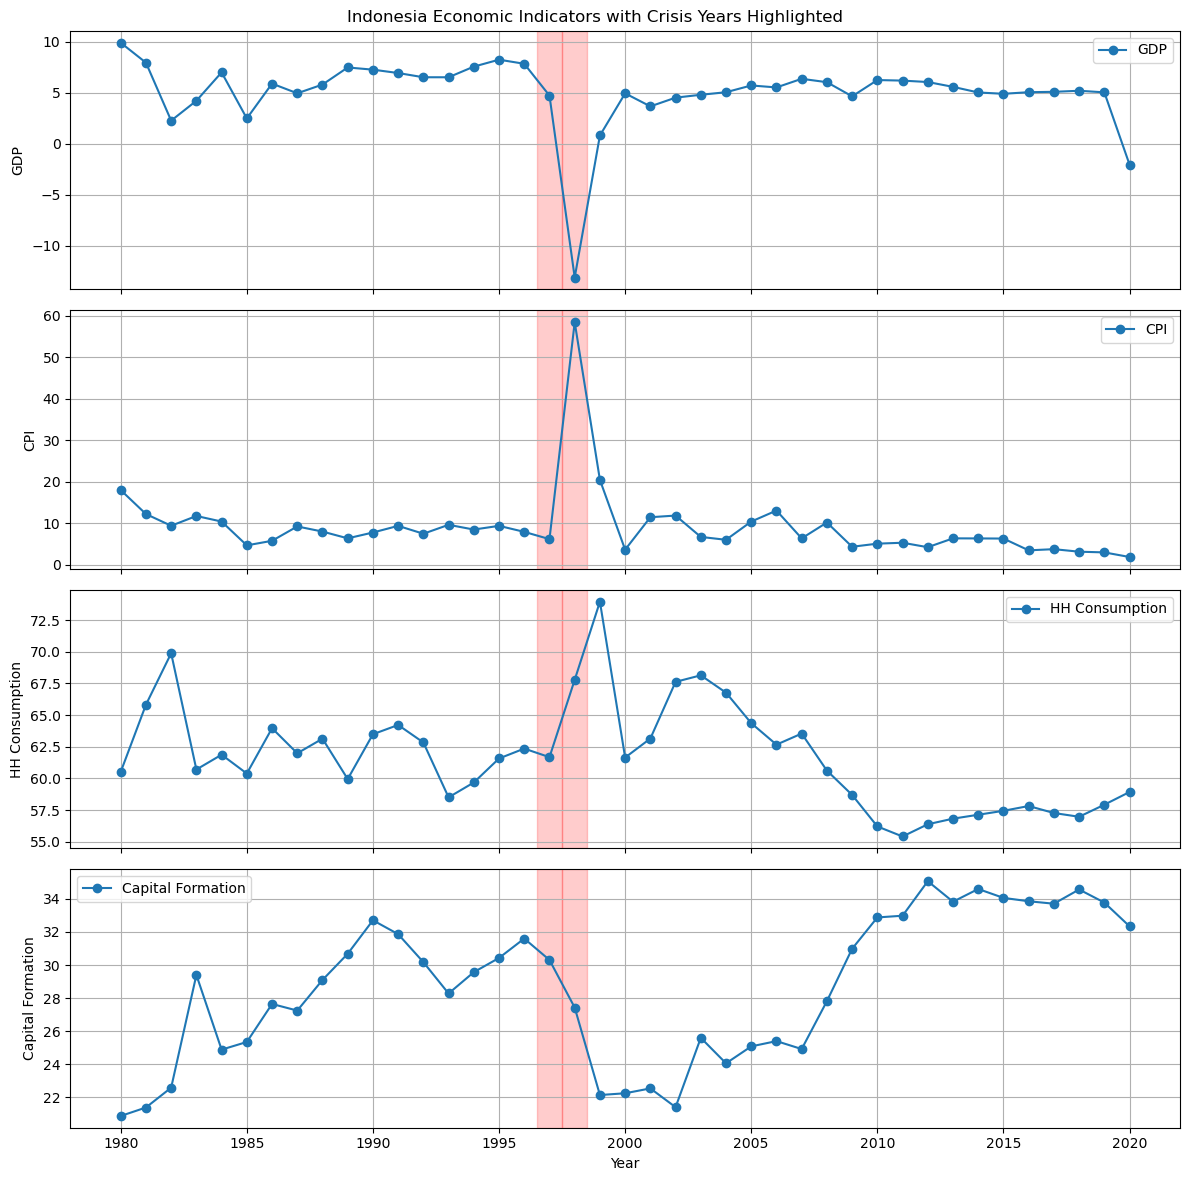

In [81]:
import matplotlib.pyplot as plt

def shade_crisis(ax, crisis_years):
    for year in crisis_years:
        ax.axvspan(year - 0.5, year + 0.5, color='red', alpha=0.2)

fig, axes = plt.subplots(4, 1, figsize=(12, 12), sharex=True)

indicators = ['GDP', 'CPI', 'HH Consumption', 'Capital Formation']
crisis_years = [1997, 1998]

for i, col in enumerate(indicators):
    axes[i].plot(indonesia['Year'], indonesia[col], marker='o', label=col)
    shade_crisis(axes[i], crisis_years)
    axes[i].set_ylabel(col)
    axes[i].legend()
    axes[i].grid(True)

axes[-1].set_xlabel('Year')
plt.suptitle('Indonesia Economic Indicators with Crisis Years Highlighted')
plt.tight_layout()
plt.show()

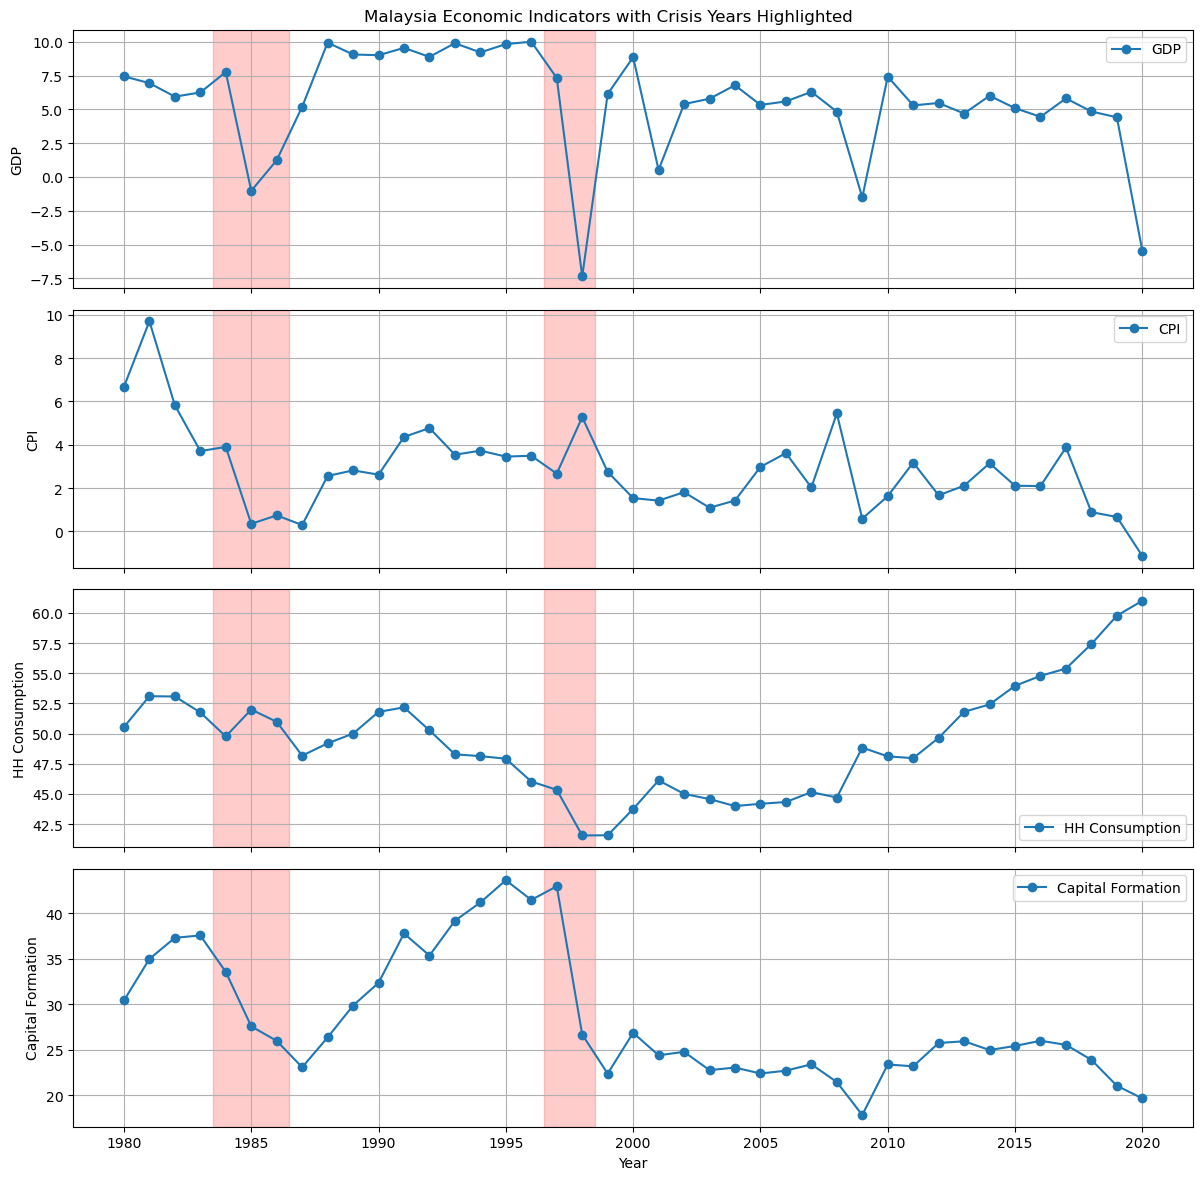

In [82]:
def shade_crisis(ax, crisis_years):
    for start_year, end_year in crisis_years:
        ax.axvspan(start_year - 0.5, end_year + 0.5, color='red', alpha=0.2)

fig, axes = plt.subplots(4, 1, figsize=(12, 12), sharex=True)

indicators = ['GDP', 'CPI', 'HH Consumption', 'Capital Formation']
crisis_years = [[1984, 1986], [1997, 1998]]

for i, col in enumerate(indicators):
    axes[i].plot(malaysia['Year'], malaysia[col], marker='o', label=col)
    shade_crisis(axes[i], crisis_years)
    axes[i].set_ylabel(col)
    axes[i].legend()
    axes[i].grid(True)

axes[-1].set_xlabel('Year')
plt.suptitle('Malaysia Economic Indicators with Crisis Years Highlighted')
plt.tight_layout()
plt.show()

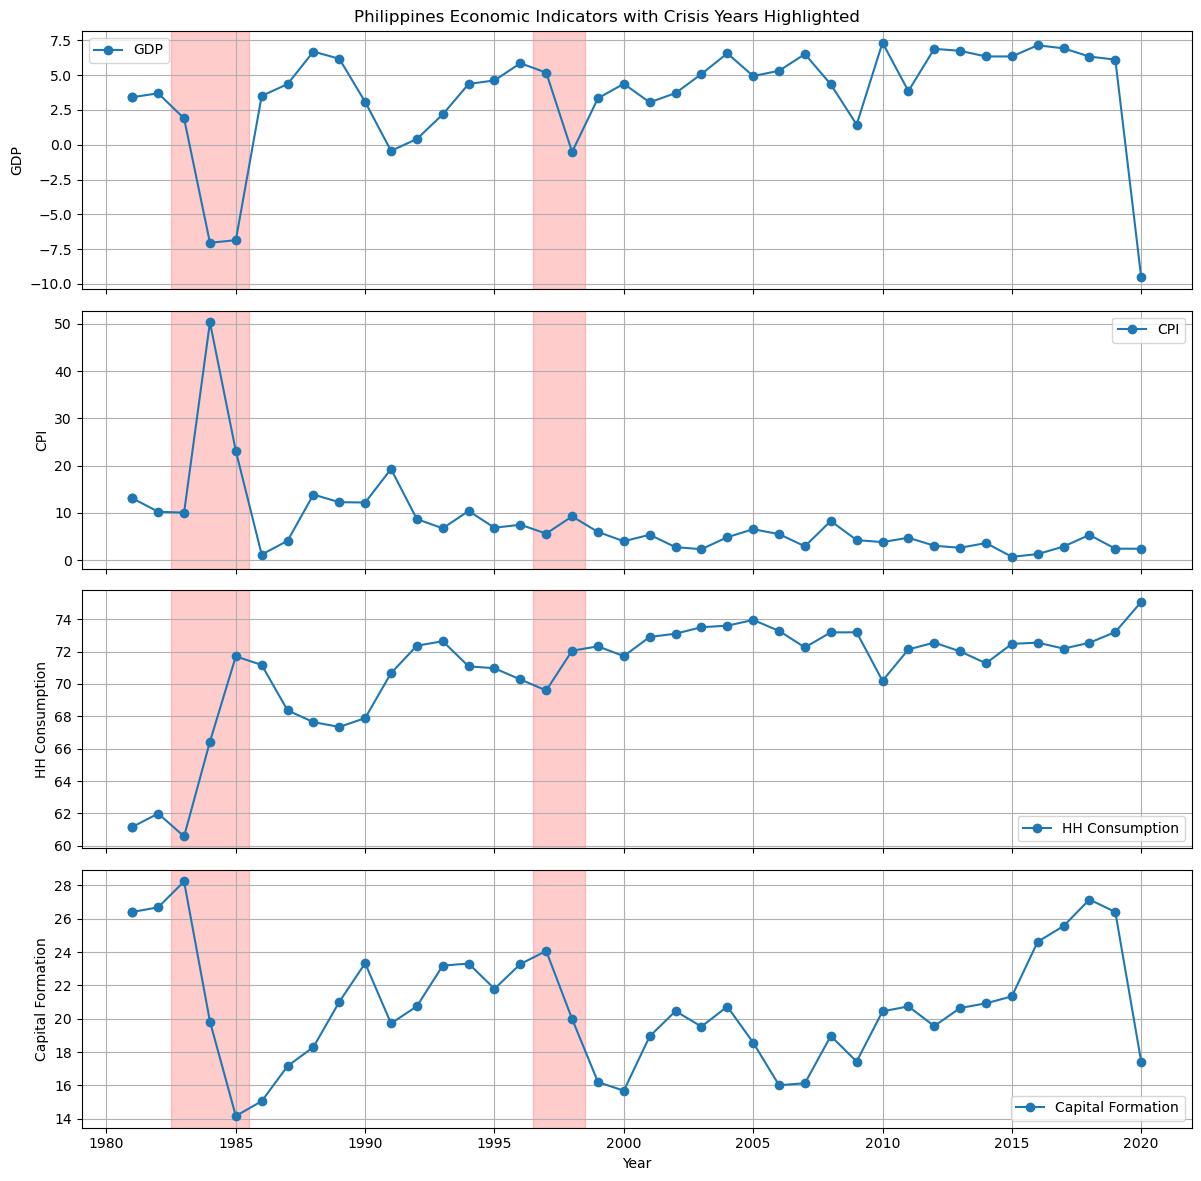

In [83]:
def shade_crisis(ax, crisis_years):
    for start_year, end_year in crisis_years:
        ax.axvspan(start_year - 0.5, end_year + 0.5, color='red', alpha=0.2)

fig, axes = plt.subplots(4, 1, figsize=(12, 12), sharex=True)

indicators = ['GDP', 'CPI', 'HH Consumption', 'Capital Formation']
crisis_years = [[1983, 1985], [1997, 1998]]

for i, col in enumerate(indicators):
    axes[i].plot(philippines['Year'], philippines[col], marker='o', label=col)
    shade_crisis(axes[i], crisis_years)
    axes[i].set_ylabel(col)
    axes[i].legend()
    axes[i].grid(True)

axes[-1].set_xlabel('Year')
plt.suptitle('Philippines Economic Indicators with Crisis Years Highlighted')
plt.tight_layout()
plt.show()

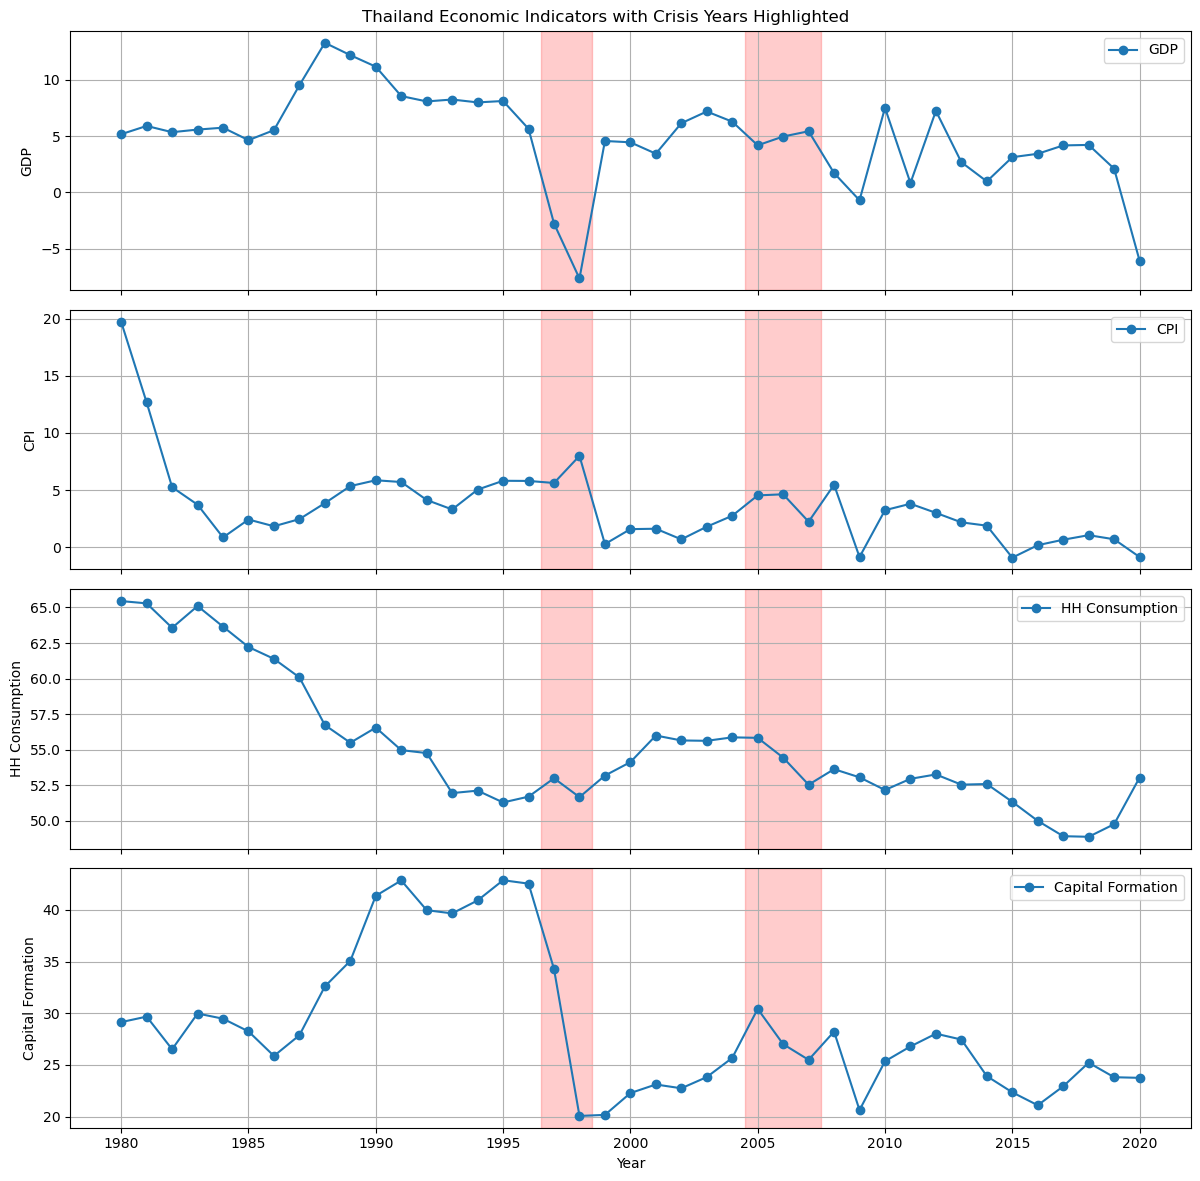

In [84]:
def shade_crisis(ax, crisis_years):
    for start_year, end_year in crisis_years:
        ax.axvspan(start_year - 0.5, end_year + 0.5, color='red', alpha=0.2)

fig, axes = plt.subplots(4, 1, figsize=(12, 12), sharex=True)

indicators = ['GDP', 'CPI', 'HH Consumption', 'Capital Formation']
crisis_years = [[1997, 1998], [2005, 2007]]

for i, col in enumerate(indicators):
    axes[i].plot(thailand['Year'], thailand[col], marker='o', label=col)
    shade_crisis(axes[i], crisis_years)
    axes[i].set_ylabel(col)
    axes[i].legend()
    axes[i].grid(True)

axes[-1].set_xlabel('Year')
plt.suptitle('Thailand Economic Indicators with Crisis Years Highlighted')
plt.tight_layout()
plt.show()

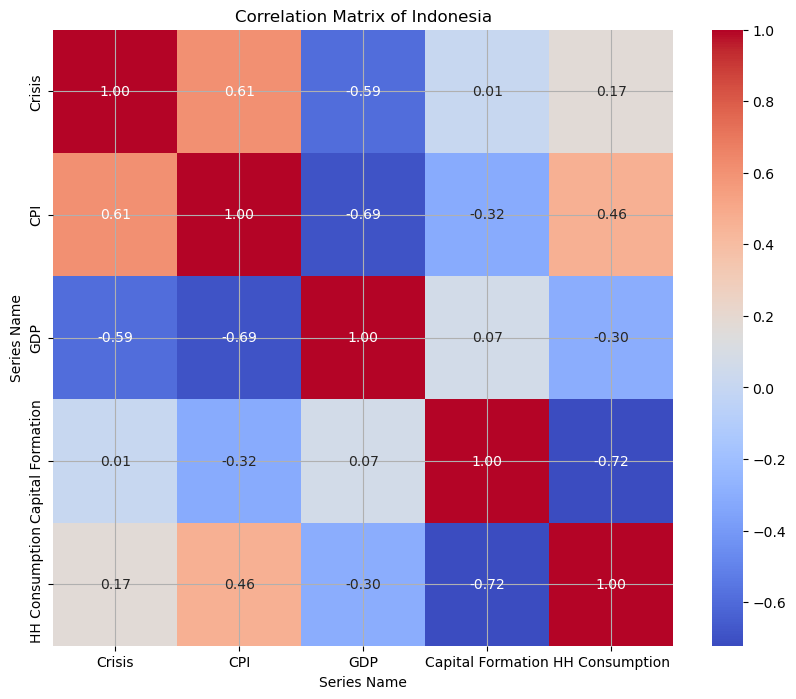

In [85]:
# correlation matrix of indonesia for cpi, gdp, capital formation and hh consumption
indonesia_corr = indonesia[['Crisis', 'CPI', 'GDP', 'Capital Formation', 'HH Consumption']].corr()
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(indonesia_corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Indonesia')
plt.show()

In [86]:
indonesia['GDP_delta'] = indonesia['GDP'].diff()
indonesia['CPI_delta'] = indonesia['CPI'].diff()
indonesia['HH_Consumption_delta'] = indonesia['HH Consumption'].diff()
indonesia['Capital_Formation_delta'] = indonesia['Capital Formation'].diff()

indonesia = indonesia.dropna().reset_index(drop=True)

indonesia[['Year', 'GDP', 'GDP_delta', 'CPI', 'CPI_delta', 'Crisis']].head()

Series Name,Year,GDP,GDP_delta,CPI,CPI_delta,Crisis
0,1981,7.9272,-1.9529,12.2659,-5.7695,0
1,1982,2.2464,-5.6807,9.4454,-2.8205,0
2,1983,4.1930,1.9465,11.7997,2.3543,0
3,1984,6.9755,2.7826,10.4550,-1.3447,0
4,1985,2.4621,-4.5134,4.7245,-5.7305,0


In [87]:
malaysia['GDP_delta'] = malaysia['GDP'].diff()
malaysia['CPI_delta'] = malaysia['CPI'].diff()
malaysia['HH_Consumption_delta'] = malaysia['HH Consumption'].diff()
malaysia['Capital_Formation_delta'] = malaysia['Capital Formation'].diff()

malaysia = malaysia.dropna().reset_index(drop=True)

malaysia[['Year', 'GDP', 'GDP_delta', 'CPI', 'CPI_delta', 'Crisis']].head()

Series Name,Year,GDP,GDP_delta,CPI,CPI_delta,Crisis
0,1981,6.9421,-0.4997,9.7000,3.0251,0
1,1982,5.9432,-0.9990,5.8189,-3.8811,0
2,1983,6.2522,0.3091,3.7042,-2.1147,0
3,1984,7.7618,1.5096,3.8973,0.1930,0
4,1985,-1.0253,-8.7870,0.3465,-3.5508,0


In [88]:
philippines['GDP_delta'] = philippines['GDP'].diff()
philippines['CPI_delta'] = philippines['CPI'].diff()
philippines['HH_Consumption_delta'] = philippines['HH Consumption'].diff()
philippines['Capital_Formation_delta'] = philippines['Capital Formation'].diff()

philippines = philippines.dropna().reset_index(drop=True)

philippines[['Year', 'GDP', 'GDP_delta', 'CPI', 'CPI_delta', 'Crisis']].head()

Series Name,Year,GDP,GDP_delta,CPI,CPI_delta,Crisis
0,1981,3.4222,0.0000,13.0826,0.0000,0
1,1982,3.6984,0.2762,10.2217,-2.8609,0
2,1983,1.8970,-1.8015,10.0294,-0.1924,1
3,1984,-7.0394,-8.9363,50.3390,40.3096,1
4,1985,-6.8584,0.1810,23.1031,-27.2359,1


In [89]:
thailand['GDP_delta'] = thailand['GDP'].diff()
thailand['CPI_delta'] = thailand['CPI'].diff()
thailand['HH_Consumption_delta'] = thailand['HH Consumption'].diff()
thailand['Capital_Formation_delta'] = thailand['Capital Formation'].diff()

thailand = thailand.dropna().reset_index(drop=True)

thailand[['Year', 'GDP', 'GDP_delta', 'CPI', 'CPI_delta', 'Crisis']].head()

Series Name,Year,GDP,GDP_delta,CPI,CPI_delta,Crisis
0,1981,5.9069,0.7333,12.6630,-7.0405,0
1,1982,5.3523,-0.5545,5.2591,-7.4039,0
2,1983,5.5842,0.2319,3.7265,-1.5325,0
3,1984,5.7524,0.1682,0.8649,-2.8616,0
4,1985,4.6472,-1.1052,2.4317,1.5668,0


In [90]:
# save the modified dataframes to CSV files
indonesia.to_csv('indonesia_processed.csv', index=False)
malaysia.to_csv('malaysia_processed.csv', index=False)
philippines.to_csv('philippines_processed.csv', index=False)
thailand.to_csv('thailand_processed.csv', index=False)

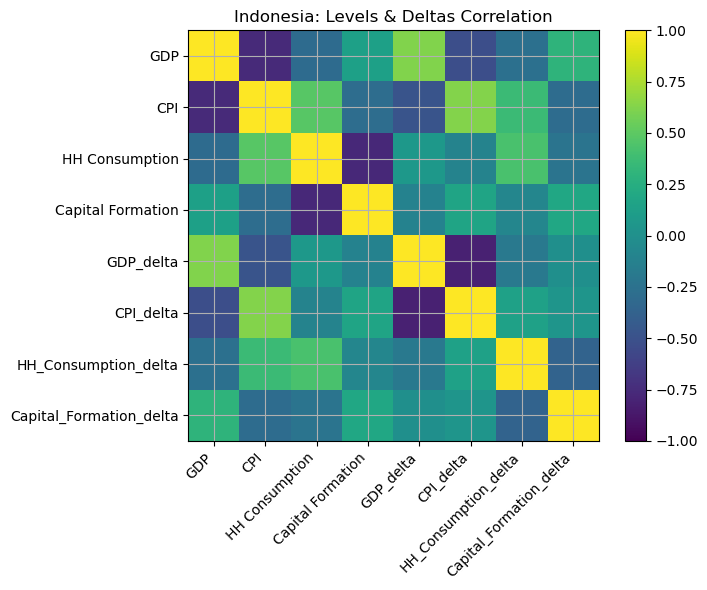

In [91]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt

def corr_heatmap(df, cols, title='Correlation (Pearson)'):
    C = df[cols].corr()
    fig, ax = plt.subplots(figsize=(8,6))
    im = ax.imshow(C, vmin=-1, vmax=1)
    ax.set_xticks(range(len(cols))); ax.set_xticklabels(cols, rotation=45, ha='right')
    ax.set_yticks(range(len(cols))); ax.set_yticklabels(cols)
    plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    ax.set_title(title)
    plt.tight_layout(); plt.show()

base_cols = ['GDP','CPI','HH Consumption','Capital Formation']
delta_cols = ['GDP_delta','CPI_delta','HH_Consumption_delta','Capital_Formation_delta']
corr_heatmap(indonesia, base_cols + delta_cols, title='Indonesia: Levels & Deltas Correlation')

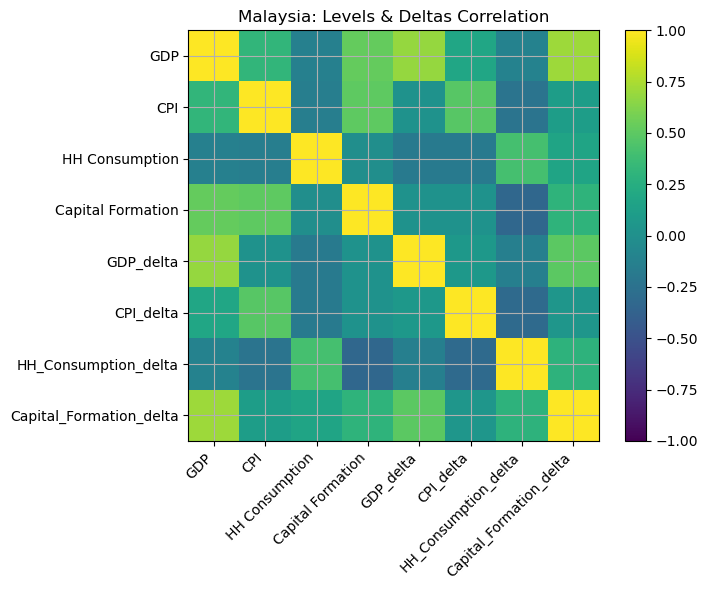

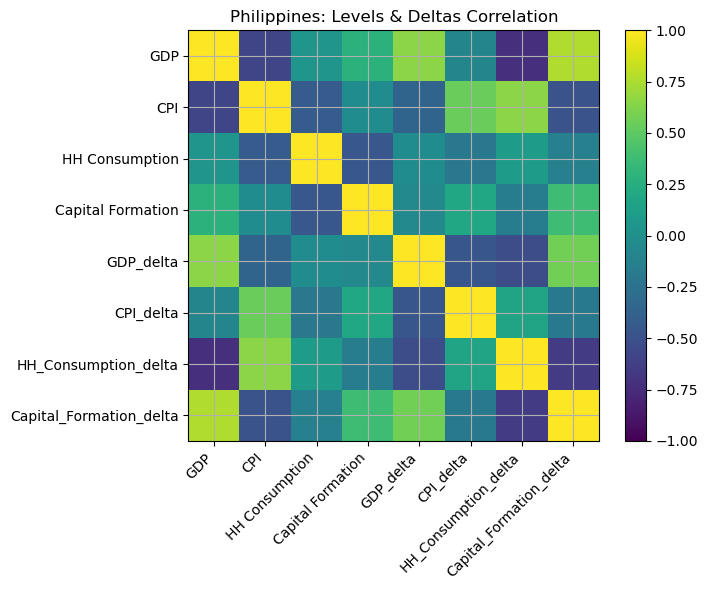

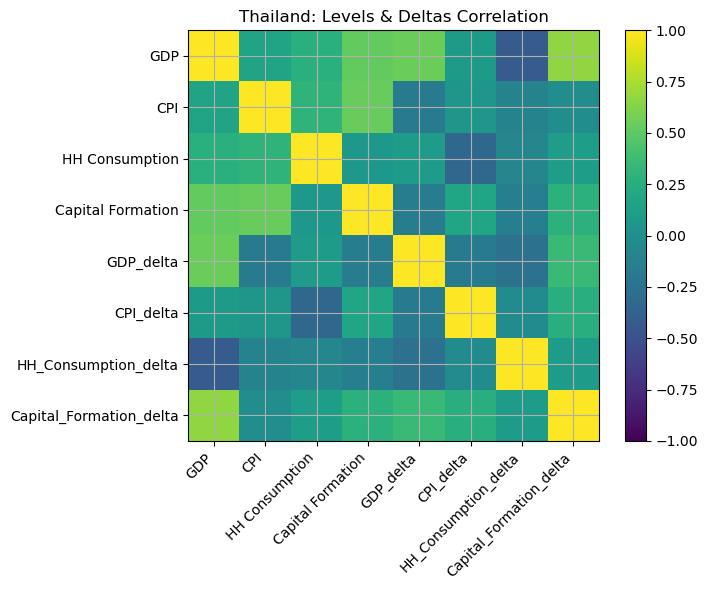

In [92]:
corr_heatmap(malaysia, base_cols + delta_cols, title='Malaysia: Levels & Deltas Correlation')
corr_heatmap(philippines, base_cols + delta_cols, title='Philippines: Levels & Deltas Correlation')
corr_heatmap(thailand, base_cols + delta_cols, title='Thailand: Levels & Deltas Correlation')

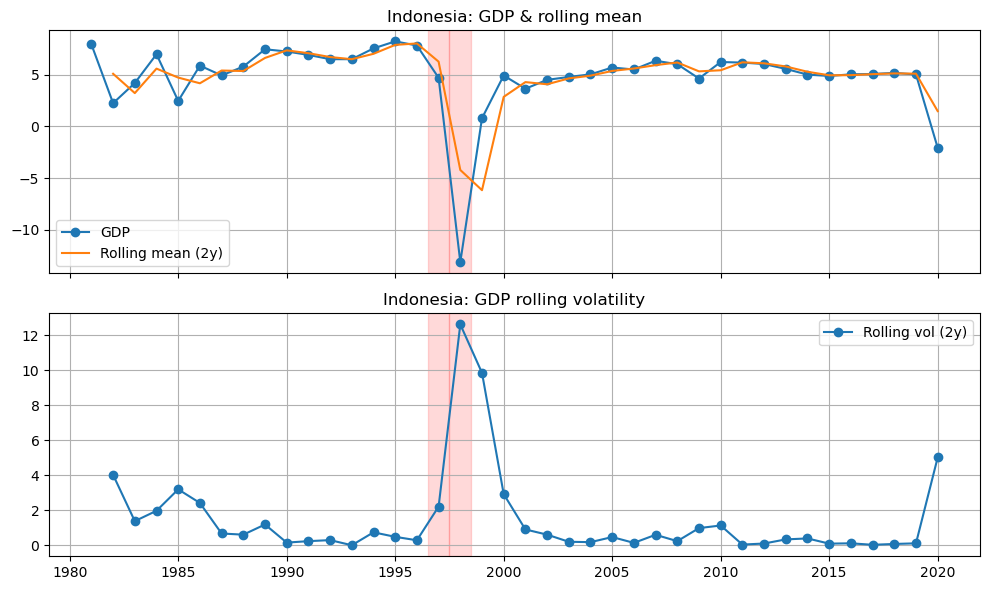

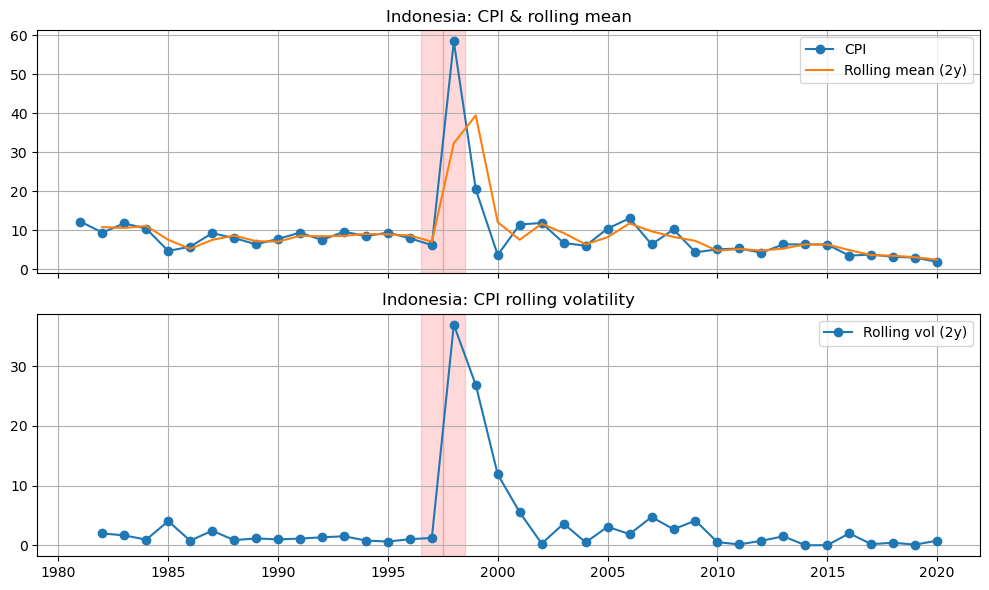

In [93]:
def plot_rolling_stats(df, col, win_mean=2, win_vol=2, title_prefix=''):
    d = df.set_index('Year')
    rm = d[col].rolling(win_mean).mean()
    rv = d[col].rolling(win_vol).std()
    fig, ax = plt.subplots(2,1, figsize=(10,6), sharex=True)
    ax[0].plot(d.index, d[col], marker='o', label=col)
    ax[0].plot(rm.index, rm, label=f'Rolling mean ({win_mean}y)')
    ax[0].legend(); ax[0].set_title(f'{title_prefix}{col} & rolling mean')
    ax[1].plot(rv.index, rv, marker='o', label=f'Rolling vol ({win_vol}y)')
    ax[1].legend(); ax[1].set_title(f'{title_prefix}{col} rolling volatility')
    for crisis_year in d.index[d['Crisis']==1]:
        for a in ax:
            a.axvspan(crisis_year-0.5, crisis_year+0.5, alpha=0.15, color='red')
    plt.tight_layout(); plt.show()

for c in ['GDP','CPI']:
    plot_rolling_stats(indonesia, c, title_prefix='Indonesia: ')

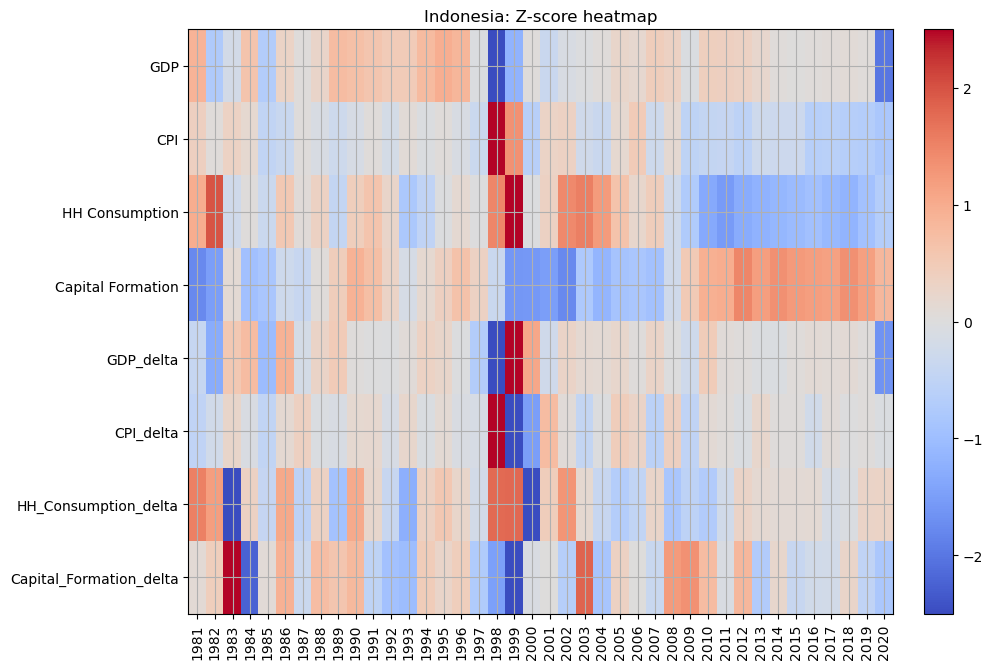

In [94]:
def zscore_heatmap(df, cols, title='Standardized features over time'):
    d = df[['Year'] + cols].copy()
    Z = (d[cols] - d[cols].mean()) / d[cols].std(ddof=0)
    fig, ax = plt.subplots(figsize=(10, len(cols)*0.6 + 2))
    im = ax.imshow(Z.T, aspect='auto', cmap='coolwarm', vmin=-2.5, vmax=2.5)
    ax.set_yticks(range(len(cols))); ax.set_yticklabels(cols)
    ax.set_xticks(range(len(d['Year']))); ax.set_xticklabels(d['Year'], rotation=90)
    ax.set_title(title); plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    plt.tight_layout(); plt.show()

zscore_heatmap(indonesia, ['GDP','CPI','HH Consumption','Capital Formation',
                          'GDP_delta','CPI_delta','HH_Consumption_delta','Capital_Formation_delta'],
               title='Indonesia: Z-score heatmap')

In [ ]:
import warnings
warnings.filterwarnings("ignore")  # silence noisy fold warnings; remove if you want full verbosity

import numpy as np
import pandas as pd

from dataclasses import dataclass
from typing import Dict, List
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GroupKFold, GridSearchCV
from sklearn.metrics import (
    precision_recall_curve, average_precision_score,
    confusion_matrix, classification_report, make_scorer
)

# =========================
# Feature engineering
# =========================
def make_features(df: pd.DataFrame, win: int = 3) -> pd.DataFrame:
    d = df.sort_values('Year').copy()
    for col in ['GDP','CPI','HH Consumption','Capital Formation']:
        d[f'{col}_delta'] = d[col].diff()

    for col in ['GDP','CPI']:
        d[f'{col}_ma{win}']  = d[col].rolling(win).mean()
        d[f'{col}_std{win}'] = d[col].rolling(win).std()
        d[f'{col}_z{win}']   = (d[col] - d[f'{col}_ma{win}']) / d[f'{col}_std{win}']

    d['GDP_under0']   = (d['GDP'] < 0).astype(int)
    d['Joint_stress'] = ((d['GDP'] < d['GDP_ma3']) & (d['CPI_z3'] > 0)).astype(int)

    for col in ['GDP','CPI','GDP_delta','CPI_delta','GDP_z3','CPI_z3']:
        if col in d.columns:
            d[f'{col}_lag1'] = d[col].shift(1)

    return d.dropna().reset_index(drop=True)

BASE_FEATURES = [
    'GDP','CPI','HH Consumption','Capital Formation',
    'GDP_delta','CPI_delta',
    'GDP_ma3','CPI_ma3','GDP_std3','CPI_std3','GDP_z3','CPI_z3',
    'GDP_under0','Joint_stress',
    'GDP_lag1','CPI_lag1','GDP_delta_lag1','CPI_delta_lag1','GDP_z3_lag1','CPI_z3_lag1'
]

# what is gdp z3 and gdp z3 lag1? -> GDP z3 is the z-score of GDP over a 3-year rolling window, indicating how many standard deviations the current GDP is from the mean. GDP z3 lag1 is the lagged value of GDP z3, representing the previous year's z-score.

# =========================
# Threshold & metrics
# =========================
def pick_threshold_fbeta(y_true, prob, beta: float = 2.0) -> float:
    p, r, th = precision_recall_curve(y_true, prob)
    f = (1+beta**2)*(p*r)/(beta**2*p + r + 1e-12)
    return th[np.argmax(f)] if len(th) else 0.5

def evaluate_probs(y_true, prob, threshold: float) -> Dict:
    y_hat = (prob >= threshold).astype(int)
    cm = confusion_matrix(y_true, y_hat, labels=[0,1])
    report = classification_report(y_true, y_hat, digits=4, output_dict=True, zero_division=0)
    ap = average_precision_score(y_true, prob) if np.sum(y_true) > 0 else 0.0
    return {
        'threshold': round(threshold, 3),
        'PR_AUC': round(ap, 4),
        'precision_1': round(report['1']['precision'], 4),
        'recall_1': round(report['1']['recall'], 4),
        'f1_1': round(report['1']['f1-score'], 4),
        'tn': int(cm[0,0]), 'fp': int(cm[0,1]), 'fn': int(cm[1,0]), 'tp': int(cm[1,1])
    }

# =========================
# Robust scorer helpers
# =========================
def _proba_pos(scores):
    """Return positive-class score vector for either proba (2D) or decision/proba (1D)."""
    s = np.asarray(scores)
    if s.ndim == 2:
        if s.shape[1] == 2:
            return s[:, 1]
        # multi-class fallback: take max over classes
        return s.max(axis=1)
    return s  # already 1D

def _safe_ap(y_true, scores):
    p = _proba_pos(scores)
    return average_precision_score(y_true, p) if np.sum(y_true) > 0 else 0.0

# needs_threshold=True lets sklearn pass either predict_proba or decision_function
ap_scorer = make_scorer(_safe_ap, needs_threshold=True)

# =========================
# Custom time-aware splitter that guarantees positives
# =========================
class WalkForwardWithPositives:
    """
    Expanding-window walk-forward CV that enforces:
      - at least one positive in TRAIN
      - at least one positive in VALIDATION (recommended for PR-AUC)
    Validation blocks are roughly equal length.
    """
    def __init__(self, y: pd.Series, n_splits: int = 4, min_train_years: int = 8,
                 ensure_pos_in_valid: bool = True):
        self.y = np.asarray(y)
        self.n_splits = max(1, n_splits)
        self.min_train_years = max(1, min_train_years)
        self.ensure_pos_in_valid = ensure_pos_in_valid

    def split(self):
        n = len(self.y)
        val_len = max(1, n // (self.n_splits + 1))

        first_pos_idx = np.where(self.y == 1)[0]
        start_after = (first_pos_idx.min() + 1) if len(first_pos_idx) else self.min_train_years
        start = max(self.min_train_years, start_after)

        for val_start in range(start, n - val_len + 1, val_len):
            tr_idx = np.arange(0, val_start)
            va_idx = np.arange(val_start, val_start + val_len)

            if self.y[tr_idx].sum() == 0:
                continue
            if self.ensure_pos_in_valid and self.y[va_idx].sum() == 0:
                continue

            yield tr_idx, va_idx

# =========================
# Model registry
# =========================
@dataclass
class ModelSpec:
    name: str
    pipeline: Pipeline
    param_grid: Dict

def get_models() -> List[ModelSpec]:
    models = []

    # 1) L1-Logistic Regression
    lr = Pipeline([
        ('scaler', StandardScaler()),
        ('clf', LogisticRegression(
            class_weight='balanced', penalty='l1',
            solver='liblinear', max_iter=2000, random_state=0))
    ])
    models.append(ModelSpec(
        name='LogReg_L1',
        pipeline=lr,
        param_grid={'clf__C': [0.1, 0.3, 1.0, 3.0]}
    ))

    # 2) Random Forest
    rf = Pipeline([
        ('clf', RandomForestClassifier(
            class_weight='balanced', n_estimators=500,
            random_state=0))
    ])
    models.append(ModelSpec(
        name='RandomForest',
        pipeline=rf,
        param_grid={'clf__max_depth': [3, 5, 8, None],
                    'clf__min_samples_leaf': [1, 2, 4]}
    ))

    # 3) Gradient Boosting
    gb = Pipeline([
        ('clf', GradientBoostingClassifier(random_state=0))
    ])
    models.append(ModelSpec(
        name='GradBoost',
        pipeline=gb,
        param_grid={'clf__n_estimators': [150, 300],
                    'clf__learning_rate': [0.03, 0.07, 0.1],
                    'clf__max_depth': [2, 3]}
    ))
    return models

def plot_confusion_matrix_custom(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred, labels=[0,1])
    cm_norm = cm.astype(float) / cm.sum(axis=1, keepdims=True)
    fig, ax = plt.subplots(figsize=(4,4))
    sns.heatmap(cm_norm, annot=cm, fmt="d", cmap="Blues",
                xticklabels=["Normal","Crisis"], yticklabels=["Normal","Crisis"], ax=ax)
    ax.set_title(title); ax.set_xlabel("Predicted"); ax.set_ylabel("Actual")
    plt.tight_layout(); plt.show()

def plot_timeline_probs(year, y_true, y_prob, threshold, title):
    plt.figure(figsize=(10,4))
    plt.plot(year, y_prob, marker='o')
    plt.axhline(threshold, linestyle='--')
    for y, c in zip(year, y_true):
        if c == 1: plt.axvspan(y-0.5, y+0.5, alpha=0.15)
    plt.title(title); plt.xlabel('Year'); plt.ylabel('Predicted crisis probability')
    plt.tight_layout(); plt.show()

def plot_pr_curve(y_true, y_prob, title):
    p, r, _ = precision_recall_curve(y_true, y_prob)
    ap = average_precision_score(y_true, y_prob) if np.sum(y_true)>0 else 0.0
    plt.figure(figsize=(5,4)); plt.plot(r, p)
    plt.title(f'{title} (AP={ap:.3f})'); plt.xlabel('Recall'); plt.ylabel('Precision')
    plt.tight_layout(); plt.show()

from sklearn.calibration import calibration_curve
def plot_reliability(y_true, y_prob, n_bins=6, title='Calibration'):
    frac_pos, mean_pred = calibration_curve(y_true, y_prob, n_bins=n_bins, strategy='quantile')
    plt.figure(figsize=(5,4))
    plt.plot(mean_pred, frac_pos, marker='o'); plt.plot([0,1],[0,1],'--')
    plt.title(title); plt.xlabel('Mean predicted probability'); plt.ylabel('Empirical frequency')
    plt.tight_layout(); plt.show()

def plot_logreg_coefficients(best_pipeline, feature_names, top_k=12, title='Logistic coefficients'):
    clf = best_pipeline.named_steps.get('clf', None)
    if clf is None or not hasattr(clf, 'coef_'): return
    coefs = pd.Series(clf.coef_.ravel(), index=feature_names).sort_values(key=lambda s: s.abs(), ascending=False).head(top_k)
    plt.figure(figsize=(6, max(3, 0.3*len(coefs)))); coefs.sort_values().plot(kind='barh')
    plt.title(title); plt.xlabel('Weight'); plt.tight_layout(); plt.show()

def plot_feature_importance(best_pipeline, feature_names, top_k=12, title='Feature importance'):
    clf = best_pipeline.named_steps.get('clf', None)
    if clf is None or not hasattr(clf, 'feature_importances_'): return
    imp = pd.Series(clf.feature_importances_, index=feature_names).sort_values(ascending=False).head(top_k)
    plt.figure(figsize=(6, max(3,0.3*len(imp)))); imp.sort_values().plot(kind='barh')
    plt.title(title); plt.xlabel('Importance'); plt.tight_layout(); plt.show()

def econ_summary_table(y_true, y_pred, y_prob, threshold):
    """Readable confusion-based economics summary."""
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred, labels=[0,1]).ravel()
    total = len(y_true)
    out = pd.DataFrame({
        'Metric': [
            'Average Precision (PR-AUC)',
            'Threshold used',
            'True Negatives (Normal years correctly not flagged)',
            'False Positives (False alarms)',
            'False Negative (Missed crises)',
            'True Positives (Crises correctly flagged)',
            'Share False Alarms (FP / all flagged)',
            'Hit Rate on Crises (TP / all crises)'
        ],
        'Value': [
            round(average_precision_score(y_true, y_prob), 4),
            round(threshold, 3),
            tn, fp, fn, tp,
            round(fp / max(fp+tp, 1), 4),
            round(tp / max(tp+fn, 1), 4)
        ]
    })
    # tidy styling
    return (out.style
            .hide(axis='index')
            .format({'Value':'{:.4f}'})
            .set_caption('Economic Evaluation Summary'))

def visualize_model_artifacts(model_name, art, title_prefix):
    """One-stop detailed evaluation for a single model's artifacts."""
    y_true = art['y_true']; y_pred = art['y_pred']; y_prob = art['y_prob']
    thr = art['threshold']; years = art['year']; best = art['best']; feats = art['feature_cols']

    # Economic summary
    display(econ_summary_table(y_true, y_pred, y_prob, thr))

    # Plots
    plot_confusion_matrix_custom(y_true, y_pred, f"{title_prefix} — Confusion Matrix ({model_name})")
    plot_timeline_probs(years, y_true, y_prob, thr, f"{title_prefix} — Crisis probability ({model_name})")
    plot_pr_curve(y_true, y_prob, f"{title_prefix} — PR curve ({model_name})")
    plot_reliability(y_true, y_prob, title=f"{title_prefix} — Calibration ({model_name})")

    # Drivers
    plot_logreg_coefficients(best, feats, title=f"{title_prefix} — Drivers (LogReg)")
    plot_feature_importance(best, feats, title=f"{title_prefix} — Drivers (Tree)")

In [96]:
# =========================
# Scenario A — Train on A, test on B
# =========================
def train_on_A_test_on_B(train_df, test_df, feature_cols, beta=2.0,
                         n_splits=4, min_train_years=8, top_k=1):
    A, B = make_features(train_df), make_features(test_df)
    cols = [c for c in feature_cols if c in A.columns and c in B.columns]
    X_tr, y_tr = A[cols], A['Crisis']
    X_te, y_te = B[cols], B['Crisis']

    wf = WalkForwardWithPositives(y_tr, n_splits=n_splits, min_train_years=min_train_years, ensure_pos_in_valid=True)
    cv = list(wf.split())
    if len(cv) == 0: raise ValueError("WalkForwardWithPositives produced 0 folds.")

    rows, artifacts = [], {}
    for spec in get_models():
        gcv = GridSearchCV(spec.pipeline, spec.param_grid, cv=cv, scoring=ap_scorer, error_score=0.0)
        gcv.fit(X_tr, y_tr)
        best = gcv.best_estimator_

        prob_tr = _proba_pos(best.predict_proba(X_tr) if hasattr(best,"predict_proba") else best.decision_function(X_tr))
        t_star = pick_threshold_fbeta(y_tr, prob_tr, beta=beta)

        prob_te = _proba_pos(best.predict_proba(X_te) if hasattr(best,"predict_proba") else best.decision_function(X_te))
        metrics = evaluate_probs(y_te, prob_te, t_star)
        metrics.update({'model': spec.name, 'best_params': gcv.best_params_})
        rows.append(metrics)

        artifacts[spec.name] = dict(best=best, threshold=t_star, feature_cols=cols,
                                    year=B['Year'].values, y_true=y_te.values,
                                    y_prob=prob_te, y_pred=(prob_te>=t_star).astype(int))

    tbl = pd.DataFrame(rows).sort_values(['PR_AUC','recall_1'], ascending=False)
    pd.options.display.float_format = lambda v: f"{v:0.4f}"
    display(tbl.style.hide(axis='index').set_caption('Scenario A — Model comparison (A→B)'))

    # visualize top_k models
    for m in tbl['model'].head(top_k):
        visualize_model_artifacts(m, artifacts[m], title_prefix="Malaysia (trained on Indonesia)")

    return tbl, artifacts

threshold,PR_AUC,precision_1,recall_1,f1_1,tn,fp,fn,tp,model,best_params
0.990000,0.750000,0.000000,0.000000,0.000000,35,0,2,0,GradBoost,"{'clf__learning_rate': 0.03, 'clf__max_depth': 2, 'clf__n_estimators': 150}"
0.662000,0.666700,0.200000,0.500000,0.285700,31,4,1,1,LogReg_L1,{'clf__C': 0.3}
0.655000,0.666700,0.000000,0.000000,0.000000,35,0,2,0,RandomForest,"{'clf__max_depth': 3, 'clf__min_samples_leaf': 1}"


Metric,Value
Average Precision (PR-AUC),0.7500
Threshold used,0.9900
True Negatives (Normal years correctly not flagged),35.0000
False Positives (False alarms),0.0000
False Negative (Missed crises),2.0000
True Positives (Crises correctly flagged),0.0000
Share False Alarms (FP / all flagged),0.0000
Hit Rate on Crises (TP / all crises),0.0000


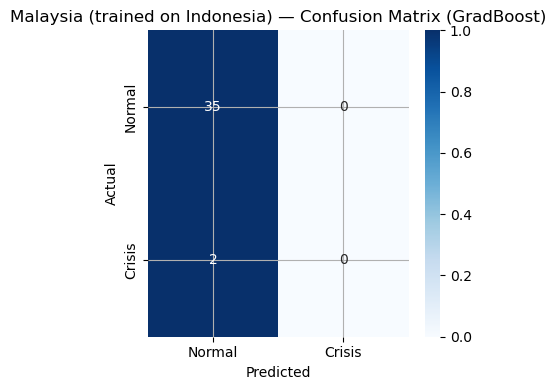

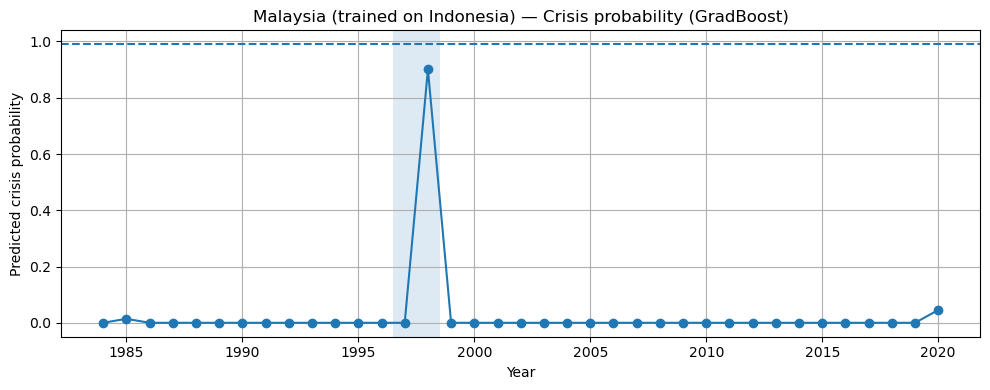

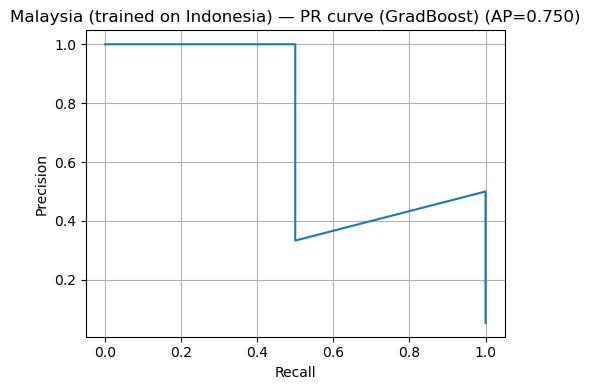

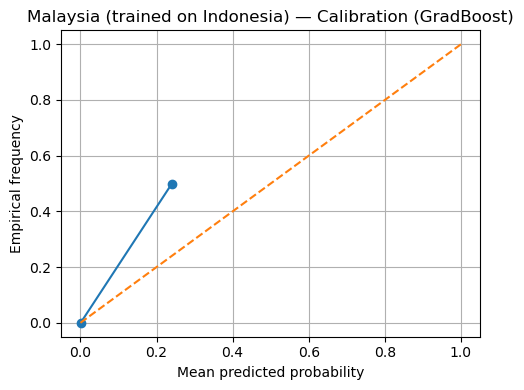

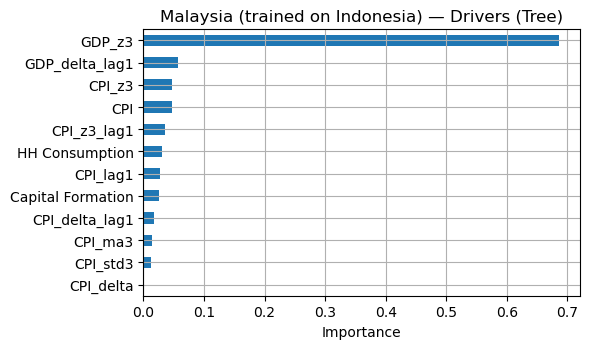

Metric,Value
Average Precision (PR-AUC),0.6667
Threshold used,0.6620
True Negatives (Normal years correctly not flagged),31.0000
False Positives (False alarms),4.0000
False Negative (Missed crises),1.0000
True Positives (Crises correctly flagged),1.0000
Share False Alarms (FP / all flagged),0.8000
Hit Rate on Crises (TP / all crises),0.5000


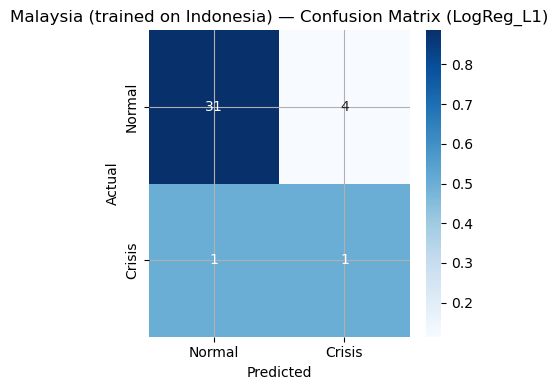

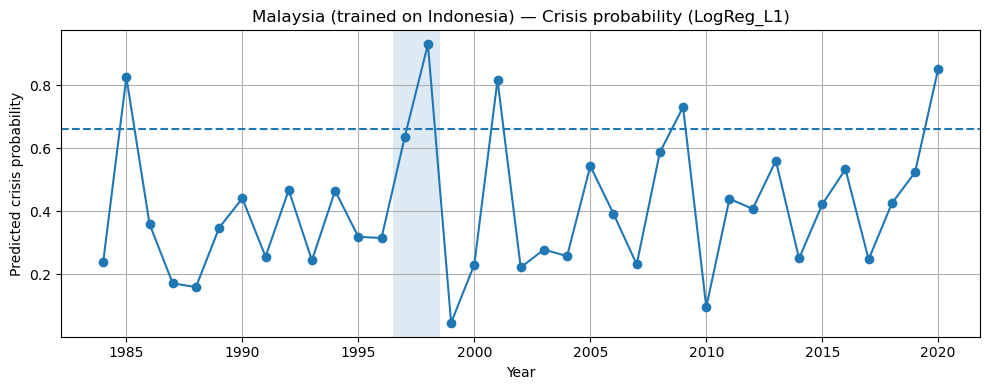

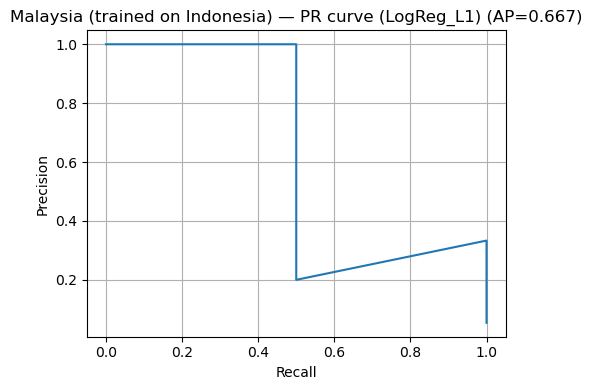

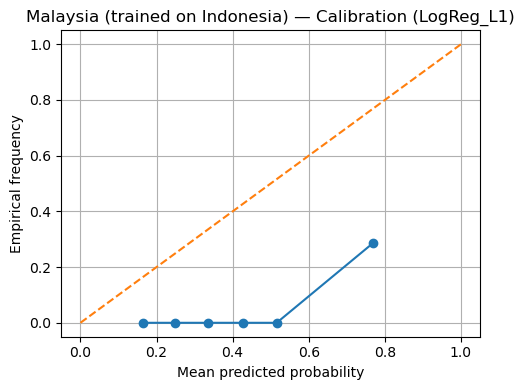

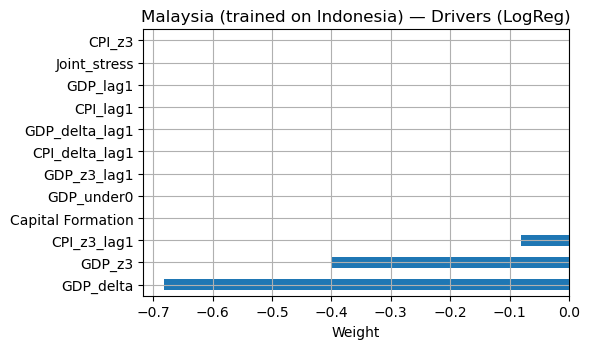

   threshold  PR_AUC  precision_1  recall_1   f1_1  tn  fp  fn  tp  \
2     0.9900  0.7500       0.0000    0.0000 0.0000  35   0   2   0   
0     0.6620  0.6667       0.2000    0.5000 0.2857  31   4   1   1   
1     0.6550  0.6667       0.0000    0.0000 0.0000  35   0   2   0   

          model                                        best_params  
2     GradBoost  {'clf__learning_rate': 0.03, 'clf__max_depth':...  
0     LogReg_L1                                    {'clf__C': 0.3}  
1  RandomForest  {'clf__max_depth': 3, 'clf__min_samples_leaf': 1}  


In [97]:
tbl_transfer, art_A = train_on_A_test_on_B(indonesia, malaysia, BASE_FEATURES, top_k=2)
print(tbl_transfer)

In [98]:
# =========================
# Scenario B — LOCO (group-aware CV)
# =========================
def prepare_country(df: pd.DataFrame, name: str) -> pd.DataFrame:
    d = make_features(df).copy()
    d['Country'] = name
    return d

def loco(country_dfs: Dict[str, pd.DataFrame], feature_cols, beta=2.0, top_k_per_country=1):
    prepared = {k: prepare_country(v, k) for k,v in country_dfs.items()}
    rows = []
    artifacts = {k:{} for k in prepared.keys()}

    for test_name in prepared.keys():
        te = prepared[test_name]
        tr = pd.concat([prepared[k] for k in prepared.keys() if k != test_name], ignore_index=True)

        cols = [c for c in feature_cols if c in tr.columns and c in te.columns]
        X_tr, y_tr, g_tr = tr[cols], tr['Crisis'], tr['Country']
        X_te, y_te = te[cols], te['Crisis']

        for spec in get_models():
            gkf = GroupKFold(n_splits=min(3, g_tr.nunique()))
            gcv = GridSearchCV(spec.pipeline, spec.param_grid,
                               cv=gkf.split(X_tr, y_tr, groups=g_tr),
                               scoring=ap_scorer, error_score=0.0)
            gcv.fit(X_tr, y_tr)
            best = gcv.best_estimator_

            prob_tr = _proba_pos(best.predict_proba(X_tr) if hasattr(best,"predict_proba") else best.decision_function(X_tr))
            t_star = pick_threshold_fbeta(y_tr, prob_tr, beta=beta)

            prob_te = _proba_pos(best.predict_proba(X_te) if hasattr(best,"predict_proba") else best.decision_function(X_te))
            metrics = evaluate_probs(y_te, prob_te, t_star)
            metrics.update({'test_country': test_name, 'model': spec.name, 'best_params': gcv.best_params_})
            rows.append(metrics)

            artifacts[test_name][spec.name] = dict(best=best, threshold=t_star, feature_cols=cols,
                                                   year=te['Year'].values, y_true=y_te.values,
                                                   y_prob=prob_te, y_pred=(prob_te>=t_star).astype(int))

    tbl = pd.DataFrame(rows).sort_values(['test_country','PR_AUC','recall_1'], ascending=[True,False,False])
    pd.options.display.float_format = lambda v: f"{v:0.4f}"
    display(tbl.style.hide(axis='index')
            .format({'PR_AUC':'{:.3f}','recall_1':'{:.3f}','precision_1':'{:.3f}','f1_1':'{:.3f}'})
            .set_caption('LOCO results — by country and model'))

    # visualize best model(s) per country
    for c in tbl['test_country'].unique():
        sub = tbl[tbl['test_country']==c].head(top_k_per_country)
        for m in sub['model']:
            visualize_model_artifacts(m, artifacts[c][m], title_prefix=f"{c} (train others)")

    return tbl, artifacts

threshold,PR_AUC,precision_1,recall_1,f1_1,tn,fp,fn,tp,test_country,model,best_params
0.598000,1.000,1.000,0.500,0.667,35,0,1,1,IDN,RandomForest,"{'clf__max_depth': 5, 'clf__min_samples_leaf': 1}"
1.000000,0.700,1.000,0.500,0.667,35,0,1,1,IDN,GradBoost,"{'clf__learning_rate': 0.1, 'clf__max_depth': 3, 'clf__n_estimators': 300}"
0.847000,0.600,1.000,0.500,0.667,35,0,1,1,IDN,LogReg_L1,{'clf__C': 0.1}
0.572000,0.700,0.000,0.000,0.000,35,0,2,0,MYS,RandomForest,"{'clf__max_depth': 5, 'clf__min_samples_leaf': 2}"
0.866000,0.611,1.000,0.500,0.667,35,0,1,1,MYS,LogReg_L1,{'clf__C': 0.1}
1.000000,0.450,0.000,0.000,0.000,35,0,2,0,MYS,GradBoost,"{'clf__learning_rate': 0.07, 'clf__max_depth': 3, 'clf__n_estimators': 300}"
0.587000,0.667,1.000,0.250,0.400,33,0,3,1,PHL,RandomForest,"{'clf__max_depth': 3, 'clf__min_samples_leaf': 2}"
0.990000,0.569,0.000,0.000,0.000,33,0,4,0,PHL,GradBoost,"{'clf__learning_rate': 0.07, 'clf__max_depth': 2, 'clf__n_estimators': 150}"
0.572000,0.497,0.429,0.750,0.545,29,4,1,3,PHL,LogReg_L1,{'clf__C': 0.1}
0.557000,1.000,0.250,1.000,0.400,29,6,0,2,THA,LogReg_L1,{'clf__C': 0.1}


Metric,Value
Average Precision (PR-AUC),1.0000
Threshold used,0.5980
True Negatives (Normal years correctly not flagged),35.0000
False Positives (False alarms),0.0000
False Negative (Missed crises),1.0000
True Positives (Crises correctly flagged),1.0000
Share False Alarms (FP / all flagged),0.0000
Hit Rate on Crises (TP / all crises),0.5000


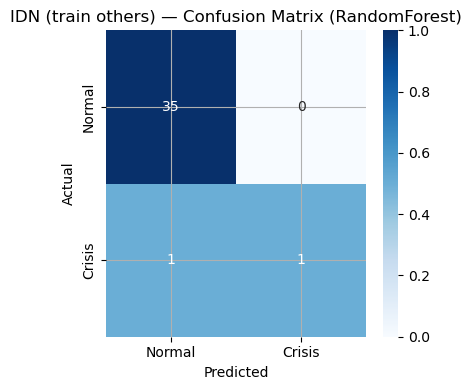

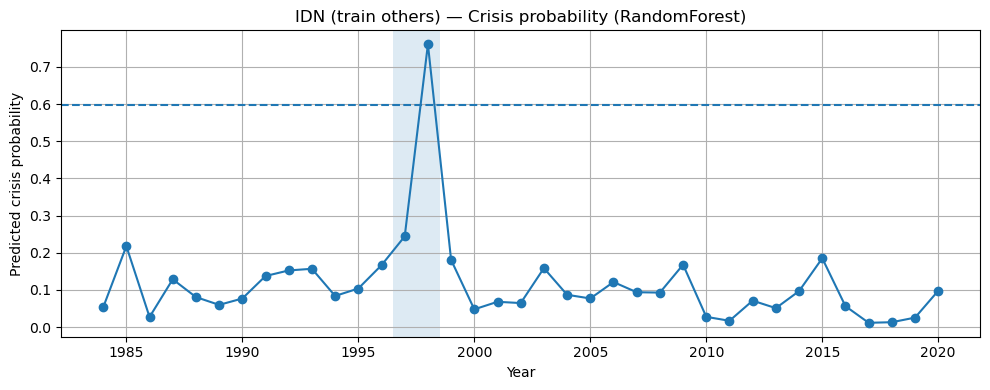

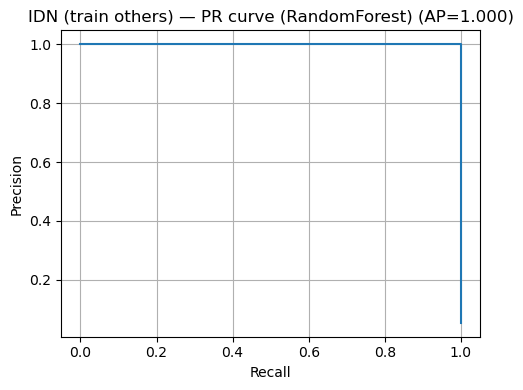

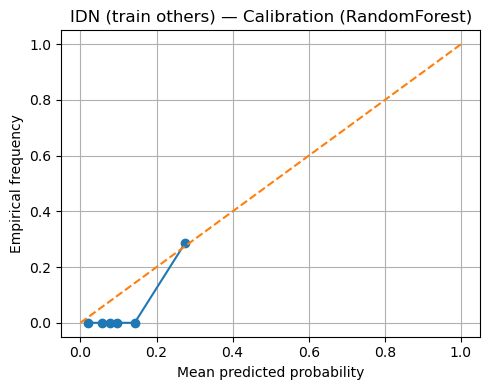

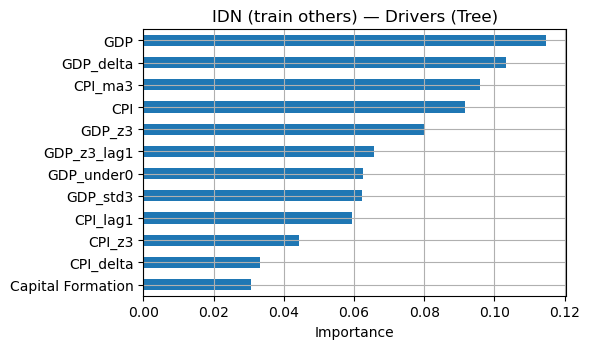

Metric,Value
Average Precision (PR-AUC),0.7000
Threshold used,0.5720
True Negatives (Normal years correctly not flagged),35.0000
False Positives (False alarms),0.0000
False Negative (Missed crises),2.0000
True Positives (Crises correctly flagged),0.0000
Share False Alarms (FP / all flagged),0.0000
Hit Rate on Crises (TP / all crises),0.0000


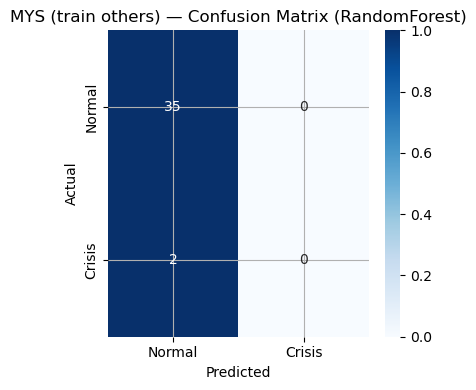

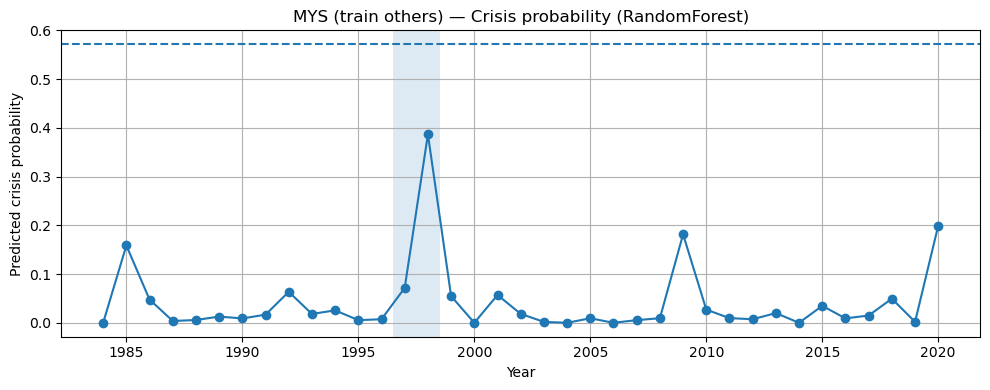

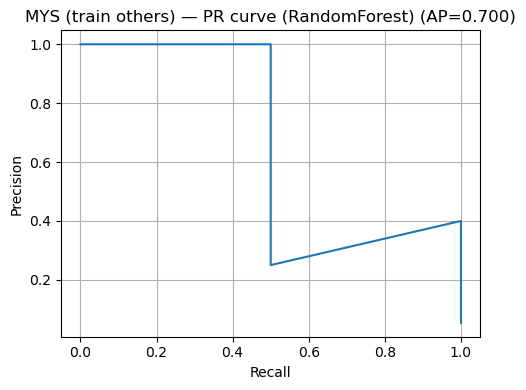

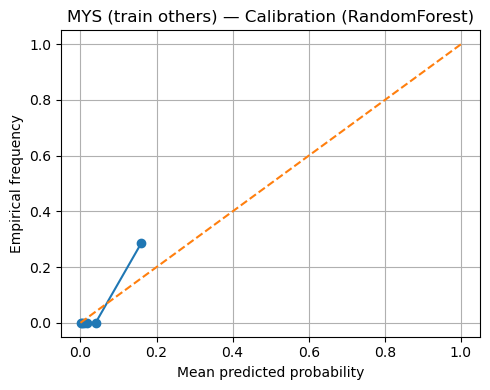

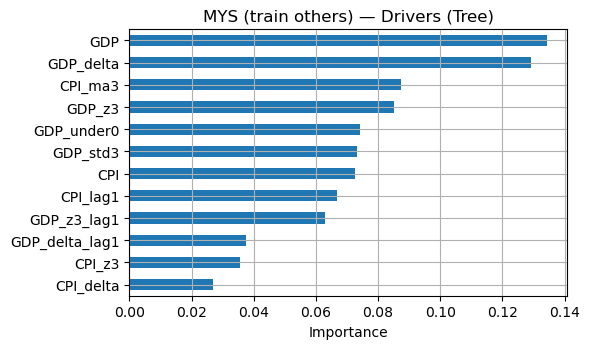

Metric,Value
Average Precision (PR-AUC),0.6667
Threshold used,0.5870
True Negatives (Normal years correctly not flagged),33.0000
False Positives (False alarms),0.0000
False Negative (Missed crises),3.0000
True Positives (Crises correctly flagged),1.0000
Share False Alarms (FP / all flagged),0.0000
Hit Rate on Crises (TP / all crises),0.2500


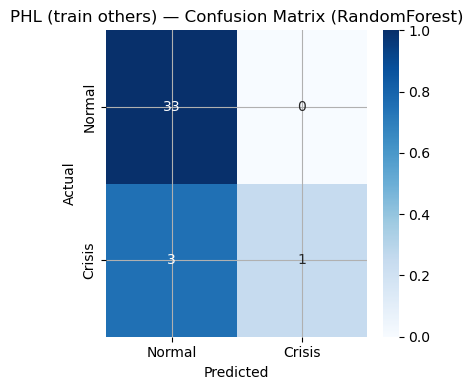

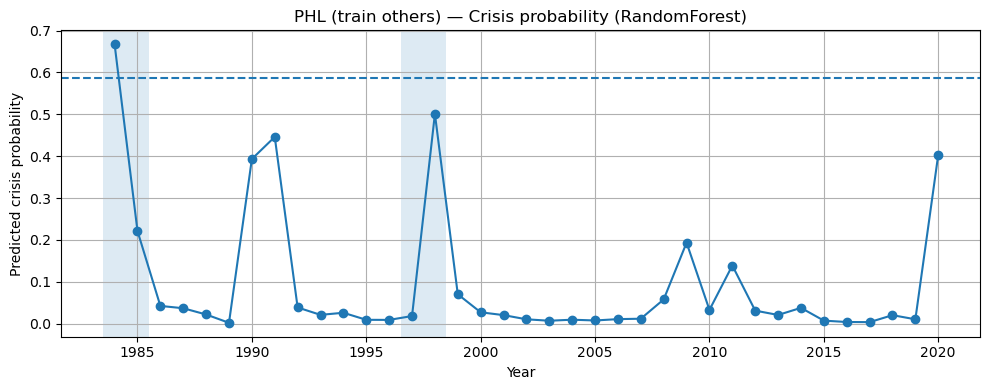

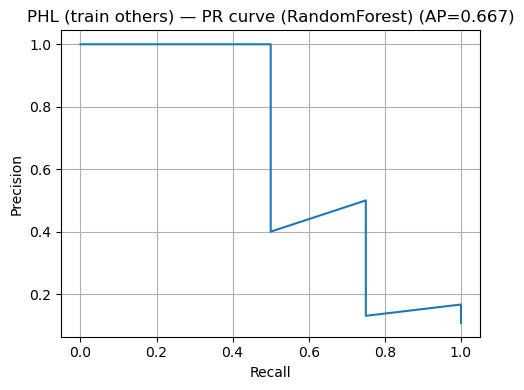

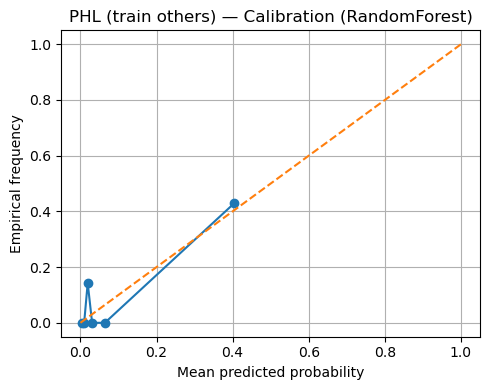

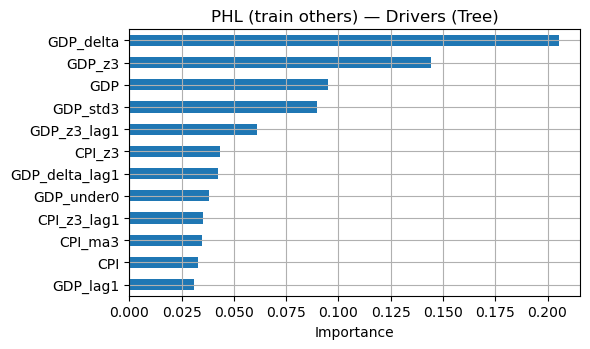

Metric,Value
Average Precision (PR-AUC),1.0000
Threshold used,0.5570
True Negatives (Normal years correctly not flagged),29.0000
False Positives (False alarms),6.0000
False Negative (Missed crises),0.0000
True Positives (Crises correctly flagged),2.0000
Share False Alarms (FP / all flagged),0.7500
Hit Rate on Crises (TP / all crises),1.0000


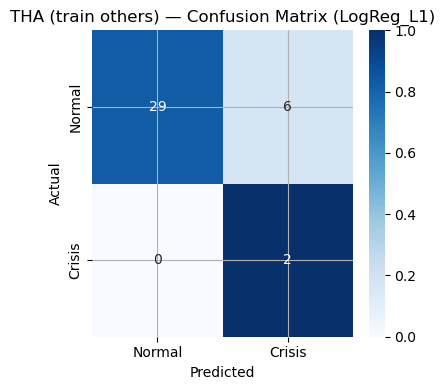

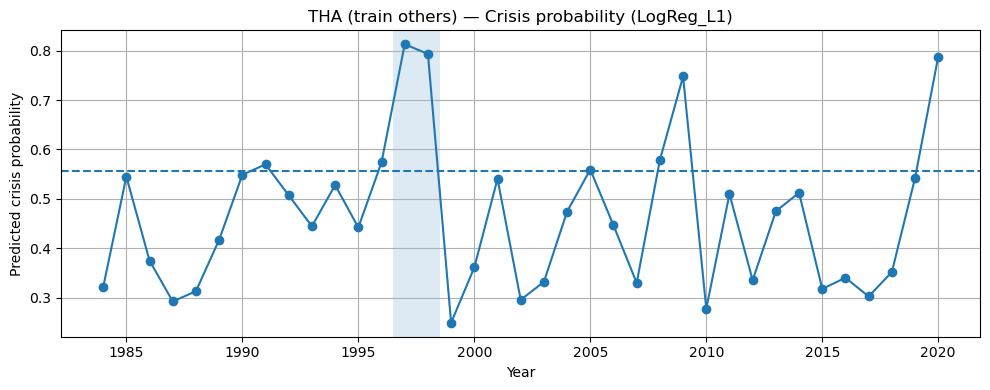

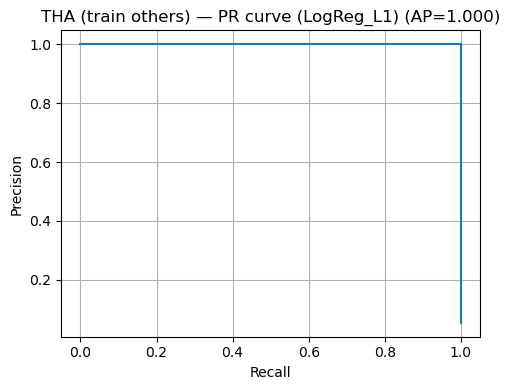

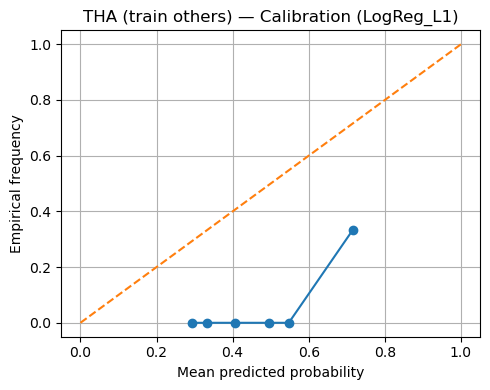

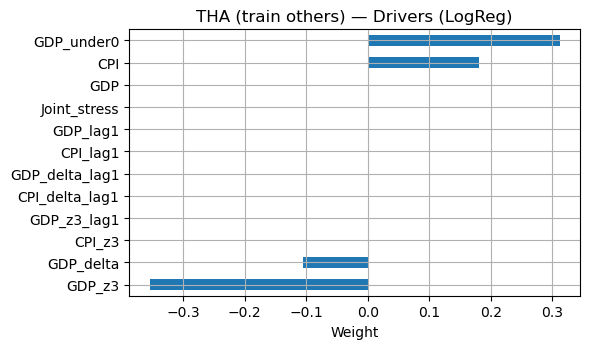

    threshold  PR_AUC  precision_1  recall_1   f1_1  tn  fp  fn  tp  \
1      0.5980  1.0000       1.0000    0.5000 0.6667  35   0   1   1   
2      1.0000  0.7000       1.0000    0.5000 0.6667  35   0   1   1   
0      0.8470  0.6000       1.0000    0.5000 0.6667  35   0   1   1   
4      0.5720  0.7000       0.0000    0.0000 0.0000  35   0   2   0   
3      0.8660  0.6111       1.0000    0.5000 0.6667  35   0   1   1   
5      1.0000  0.4500       0.0000    0.0000 0.0000  35   0   2   0   
7      0.5870  0.6667       1.0000    0.2500 0.4000  33   0   3   1   
8      0.9900  0.5687       0.0000    0.0000 0.0000  33   0   4   0   
6      0.5720  0.4972       0.4286    0.7500 0.5455  29   4   1   3   
9      0.5570  1.0000       0.2500    1.0000 0.4000  29   6   0   2   
10     0.4820  1.0000       1.0000    1.0000 1.0000  35   0   0   2   
11     0.9990  0.2262       0.0000    0.0000 0.0000  34   1   2   0   

   test_country         model  \
1           IDN  RandomForest   
2         

In [99]:
country_data = {'IDN': indonesia, 'MYS': malaysia, 'PHL': philippines, 'THA': thailand}
tbl_loco, art_loco = loco(country_data, BASE_FEATURES, top_k_per_country=1)
print(tbl_loco)

In [100]:
def loco_leaderboard(tbl_loco):
    cols = ['test_country','model','PR_AUC','recall_1','precision_1','f1_1','tp','fn','fp']
    df = tbl_loco[cols].copy()
    return (df.sort_values(['test_country','PR_AUC','recall_1','precision_1'], ascending=[True,False,False,False])
              .style.hide(axis='index')
              .format({'PR_AUC':'{:.3f}','recall_1':'{:.3f}','precision_1':'{:.3f}','f1_1':'{:.3f}'})
              .set_caption('LOCO results — by country and model'))


In [101]:
display(loco_leaderboard(tbl_loco))

test_country,model,PR_AUC,recall_1,precision_1,f1_1,tp,fn,fp
IDN,RandomForest,1.000,0.500,1.000,0.667,1,1,0
IDN,GradBoost,0.700,0.500,1.000,0.667,1,1,0
IDN,LogReg_L1,0.600,0.500,1.000,0.667,1,1,0
MYS,RandomForest,0.700,0.000,0.000,0.000,0,2,0
MYS,LogReg_L1,0.611,0.500,1.000,0.667,1,1,0
MYS,GradBoost,0.450,0.000,0.000,0.000,0,2,0
PHL,RandomForest,0.667,0.250,1.000,0.400,1,3,0
PHL,GradBoost,0.569,0.000,0.000,0.000,0,4,0
PHL,LogReg_L1,0.497,0.750,0.429,0.545,3,1,4
THA,RandomForest,1.000,1.000,1.000,1.000,2,0,0


In [102]:
# ---------- selection + KPI helpers ----------

def _best_rows(df, group=None, top_k=1):
    """
    Pick best rows by PR_AUC then recall_1 (desc). If group is given, do it per-group.
    """
    if group is None:
        return (df.sort_values(['PR_AUC','recall_1','precision_1'], ascending=[False,False,False])
                  .head(top_k)
                  .copy())
    out = []
    for g, d in df.groupby(group):
        out.append(d.sort_values(['PR_AUC','recall_1','precision_1'],
                                 ascending=[False,False,False]).head(top_k))
    return pd.concat(out, ignore_index=True)

def _econ_kpis_from_row(row):
    tp, fp, fn, tn = row['tp'], row['fp'], row['fn'], row['tn']
    return pd.Series({
        'PR-AUC'         : row['PR_AUC'],
        'Hit rate (recall)': 0.0 if (tp+fn)==0 else tp/(tp+fn),
        'False-alarm share': 0.0 if (tp+fp)==0 else fp/(tp+tp),
        'TP'             : tp, 'FN': fn, 'FP': fp, 'TN': tn
    })

def _pretty_cols(df):
    return (df.rename(columns={
        'test_country':'Country',
        'model':'Model',
        'PR_AUC':'PR-AUC',
        'recall_1':'Recall (crisis)',
        'precision_1':'Precision (crisis)',
        'f1_1':'F1 (crisis)',
        'threshold':'Threshold'
    }))

Model,PR-AUC,Precision (crisis),Recall (crisis),F1 (crisis),tn,fp,fn,tp,Threshold,best_params
GradBoost,0.750,0.000,0.000,0.000,35,0,2,0,0.990,"{'clf__learning_rate': 0.03, 'clf__max_depth': 2, 'clf__n_estimators': 150}"


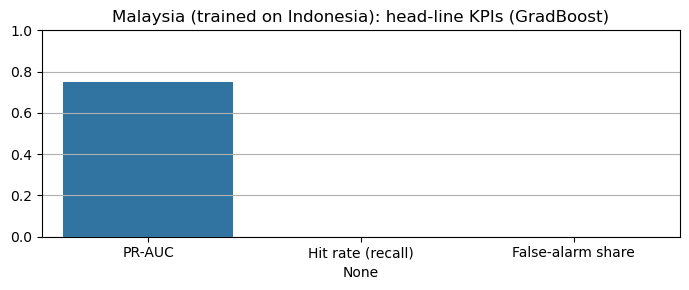

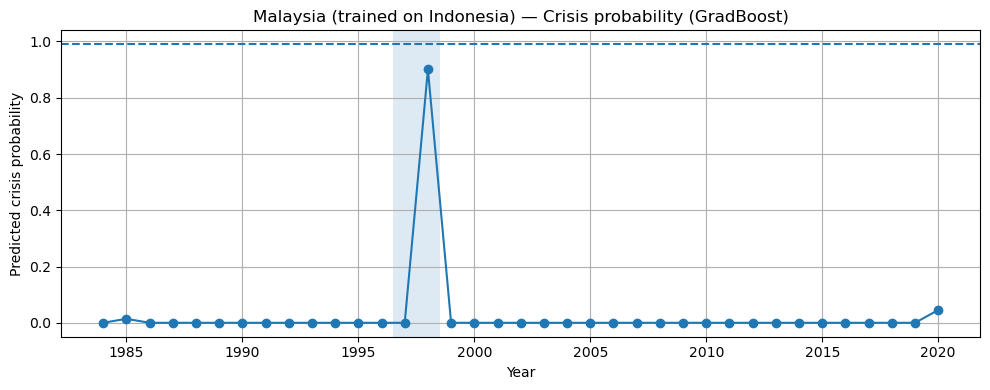

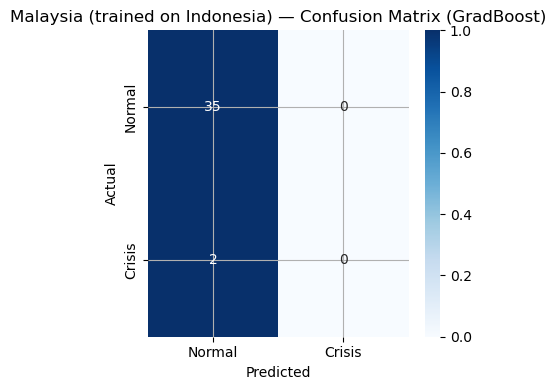

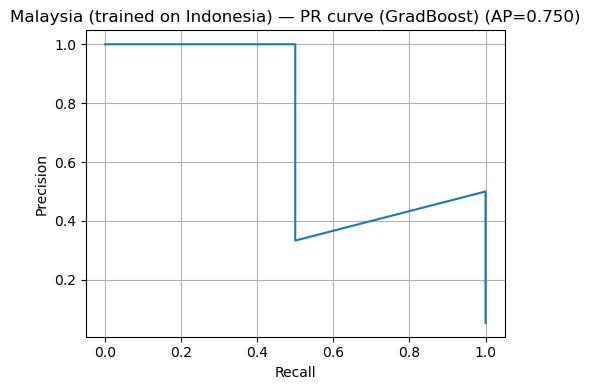

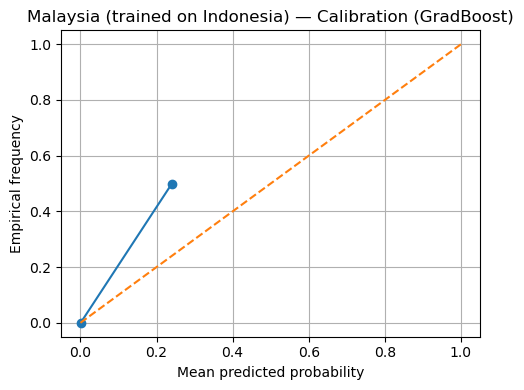

In [103]:
# ---------- Scenario A dashboard ----------
import matplotlib.pyplot as plt
import seaborn as sns

def dashboard_scenario_A(tbl_transfer, artifacts, title_prefix="Scenario A"):
    # pick best single model
    best = _best_rows(tbl_transfer, group=None, top_k=1).iloc[0]
    model_name = best['model']
    art = artifacts[model_name]

    # 2.1 Table (readable)
    disp_cols = ['model','PR_AUC','precision_1','recall_1','f1_1','tn','fp','fn','tp','threshold','best_params']
    nice = _pretty_cols(best[disp_cols].to_frame().T)
    display(nice.style.hide(axis='index')
                 .format({'PR-AUC':'{:.3f}','Precision (crisis)':'{:.3f}',
                          'Recall (crisis)':'{:.3f}','F1 (crisis)':'{:.3f}','Threshold':'{:.3f}'})
                 .set_caption(f'{title_prefix} — best model summary'))

    # 2.2 KPI bars: PR-AUC, recall, false-alarm share
    kpis = _econ_kpis_from_row(best)
    plt.figure(figsize=(7,3))
    sns.barplot(x=kpis.index[:3], y=kpis.values[:3])
    plt.ylim(0,1); plt.title(f'{title_prefix}: head-line KPIs ({model_name})')
    plt.tight_layout(); plt.show()

    # 2.3 Mini-panels (timeline + confusion)
    # timeline (you already have helpers from earlier)
    plot_timeline_probs(art['year'], art['y_true'], art['y_prob'], art['threshold'],
                        title=f"{title_prefix} — Crisis probability ({model_name})")

    plot_confusion_matrix_custom(art['y_true'], art['y_pred'],
                                 title=f"{title_prefix} — Confusion Matrix ({model_name})")

    # 2.4 optional: PR curve + calibration
    plot_pr_curve(art['y_true'], art['y_prob'], title=f"{title_prefix} — PR curve ({model_name})")
    plot_reliability(art['y_true'], art['y_prob'], title=f"{title_prefix} — Calibration ({model_name})")

# Run it (you already have tbl_transfer, art_A)
dashboard_scenario_A(tbl_transfer, art_A, title_prefix="Malaysia (trained on Indonesia)")

Country,Model,PR-AUC,Precision (crisis),Recall (crisis),F1 (crisis),tn,fp,fn,tp,Threshold,best_params
IDN,RandomForest,1.000,1.000,0.500,0.667,35,0,1,1,0.598,"{'clf__max_depth': 5, 'clf__min_samples_leaf': 1}"
MYS,RandomForest,0.700,0.000,0.000,0.000,35,0,2,0,0.572,"{'clf__max_depth': 5, 'clf__min_samples_leaf': 2}"
PHL,RandomForest,0.667,1.000,0.250,0.400,33,0,3,1,0.587,"{'clf__max_depth': 3, 'clf__min_samples_leaf': 2}"
THA,RandomForest,1.000,1.000,1.000,1.000,35,0,0,2,0.482,"{'clf__max_depth': 3, 'clf__min_samples_leaf': 4}"


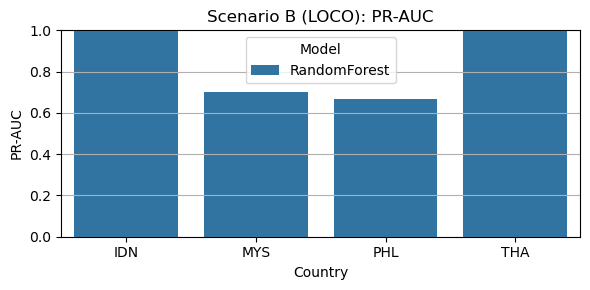

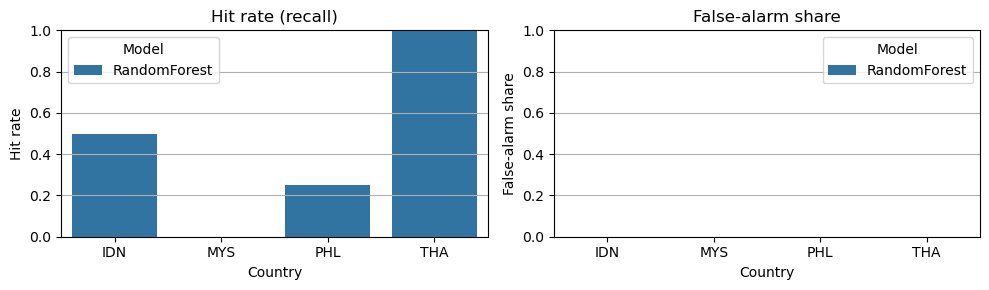


== IDN · RandomForest ==


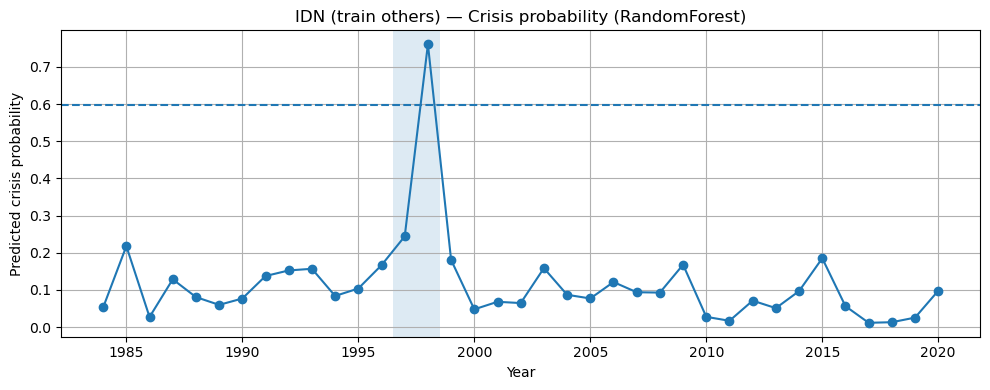

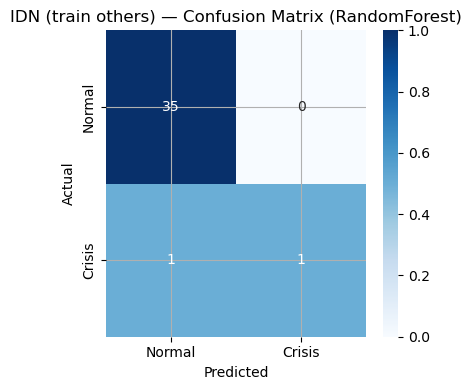


== MYS · RandomForest ==


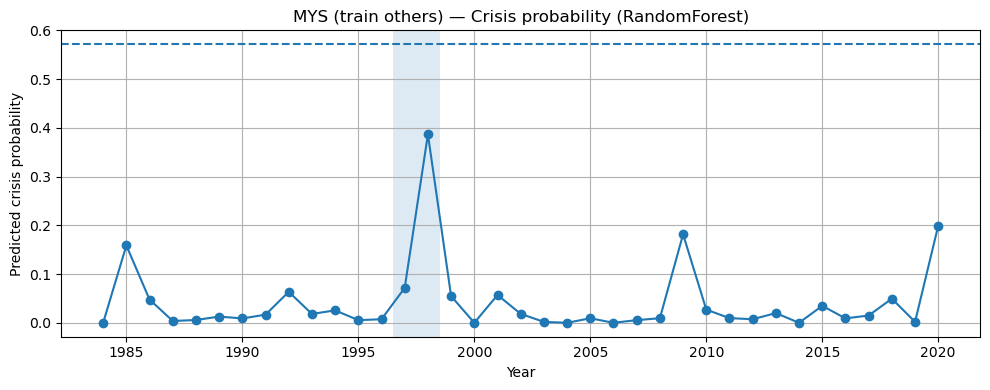

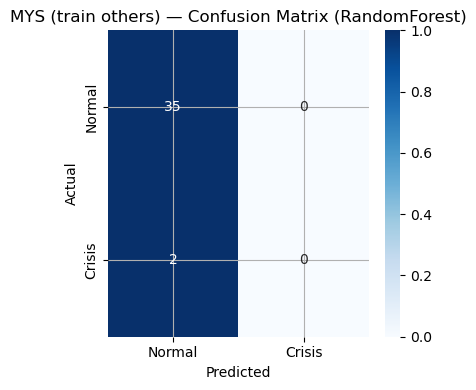


== PHL · RandomForest ==


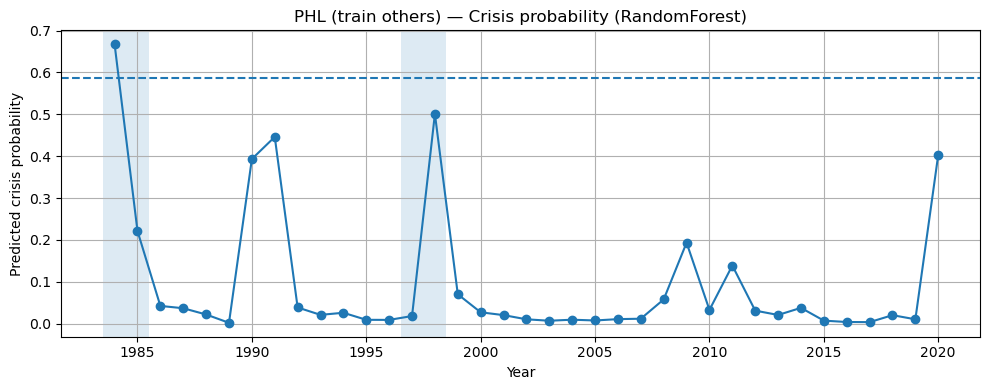

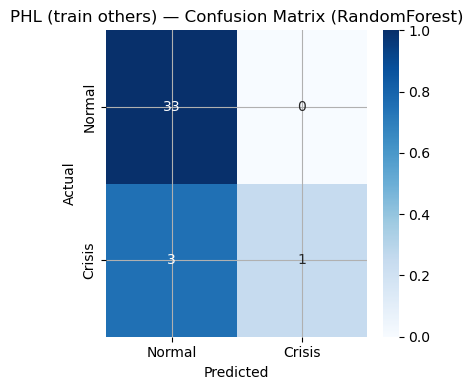


== THA · RandomForest ==


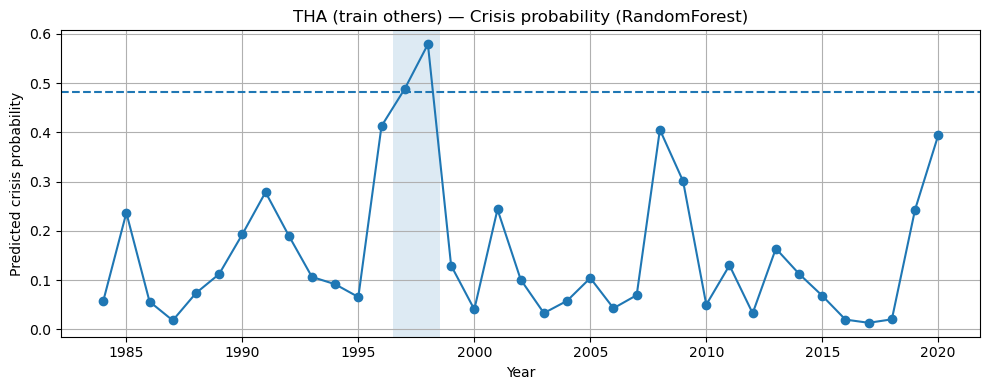

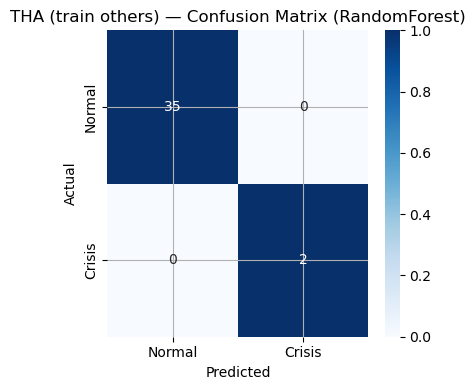

In [104]:
# ---------- Scenario B dashboard ----------
def dashboard_scenario_B(tbl_loco, artifacts, top_k_per_country=1, title_prefix="Scenario B (LOCO)"):
    # best rows per country
    best_df = _best_rows(tbl_loco, group='test_country', top_k=top_k_per_country)
    best_df = best_df.sort_values('test_country').reset_index(drop=True)

    # 3.1 Leaderboard (readable)
    nice = _pretty_cols(best_df[['test_country','model','PR_AUC','precision_1','recall_1','f1_1','tn','fp','fn','tp','threshold','best_params']])
    display(nice.style.hide(axis='index')
                 .format({'PR-AUC':'{:.3f}','Precision (crisis)':'{:.3f}',
                          'Recall (crisis)':'{:.3f}','F1 (crisis)':'{:.3f}','Threshold':'{:.3f}'})
                 .set_caption(f'{title_prefix} — best model per country'))

    # 3.2 Bars: PR-AUC by country
    plt.figure(figsize=(6,3))
    sns.barplot(data=best_df, x='test_country', y='PR_AUC', hue='model')
    plt.ylim(0,1); plt.ylabel('PR-AUC'); plt.xlabel('Country'); plt.title(f'{title_prefix}: PR-AUC')
    plt.legend(title='Model'); plt.tight_layout(); plt.show()

    # 3.3 Bars: Hit rate and False-alarm share by country
    kpi_rows = []
    for _, r in best_df.iterrows():
        s = _econ_kpis_from_row(r)
        kpi_rows.append({'Country': r['test_country'], 'Model': r['model'],
                         'Hit rate': s['Hit rate (recall)'], 'False-alarm share': s['False-alarm share']})
    kpis = pd.DataFrame(kpi_rows)

    fig, ax = plt.subplots(1,2, figsize=(10,3))
    sns.barplot(data=kpis, x='Country', y='Hit rate', hue='Model', ax=ax[0]); ax[0].set_ylim(0,1); ax[0].set_title('Hit rate (recall)')
    sns.barplot(data=kpis, x='Country', y='False-alarm share', hue='Model', ax=ax[1]); ax[1].set_ylim(0,1); ax[1].set_title('False-alarm share')
    for a in ax: a.set_xlabel('Country')
    plt.tight_layout(); plt.show()

    # 3.4 Mini-panels per country (timeline + confusion)
    for _, r in best_df.iterrows():
        c, m = r['test_country'], r['model']
        art = artifacts[c][m]
        print(f"\n== {c} · {m} ==")
        plot_timeline_probs(art['year'], art['y_true'], art['y_prob'], art['threshold'],
                            title=f"{c} (train others) — Crisis probability ({m})")
        plot_confusion_matrix_custom(art['y_true'], art['y_pred'],
                                     title=f"{c} (train others) — Confusion Matrix ({m})")

    return best_df

# Run it (you already have tbl_loco, art_loco)
best_loco = dashboard_scenario_B(tbl_loco, art_loco, top_k_per_country=1)

# Simulation for 2021-2025

In [106]:
# Get best model name per country from tbl_loco
best_per_country = (
    tbl_loco.sort_values(['test_country','PR_AUC','recall_1'],
                         ascending=[True,False,False])
            .groupby('test_country')
            .first()
)

# Extract features for each
for country, row in best_per_country.iterrows():
    model_name = row['model']
    feats = art_loco[country][model_name]['feature_cols']
    print(f"{country} → {model_name}:")
    print(feats, "\n")

IDN → RandomForest:
['GDP', 'CPI', 'HH Consumption', 'Capital Formation', 'GDP_delta', 'CPI_delta', 'GDP_ma3', 'CPI_ma3', 'GDP_std3', 'CPI_std3', 'GDP_z3', 'CPI_z3', 'GDP_under0', 'Joint_stress', 'GDP_lag1', 'CPI_lag1', 'GDP_delta_lag1', 'CPI_delta_lag1', 'GDP_z3_lag1', 'CPI_z3_lag1'] 

MYS → RandomForest:
['GDP', 'CPI', 'HH Consumption', 'Capital Formation', 'GDP_delta', 'CPI_delta', 'GDP_ma3', 'CPI_ma3', 'GDP_std3', 'CPI_std3', 'GDP_z3', 'CPI_z3', 'GDP_under0', 'Joint_stress', 'GDP_lag1', 'CPI_lag1', 'GDP_delta_lag1', 'CPI_delta_lag1', 'GDP_z3_lag1', 'CPI_z3_lag1'] 

PHL → RandomForest:
['GDP', 'CPI', 'HH Consumption', 'Capital Formation', 'GDP_delta', 'CPI_delta', 'GDP_ma3', 'CPI_ma3', 'GDP_std3', 'CPI_std3', 'GDP_z3', 'CPI_z3', 'GDP_under0', 'Joint_stress', 'GDP_lag1', 'CPI_lag1', 'GDP_delta_lag1', 'CPI_delta_lag1', 'GDP_z3_lag1', 'CPI_z3_lag1'] 

THA → LogReg_L1:
['GDP', 'CPI', 'HH Consumption', 'Capital Formation', 'GDP_delta', 'CPI_delta', 'GDP_ma3', 'CPI_ma3', 'GDP_std3', 'CPI_

In [107]:
# Best row per country from your LOCO results
best_rows = (tbl_loco.sort_values(['test_country','PR_AUC','recall_1'],
                                  ascending=[True, False, False])
                      .groupby('test_country').first())

# Map convenient country -> (model_name, artifact)
best_art = {}
for c, r in best_rows.iterrows():
    m = r['model']
    best_art[c] = {
        'model_name': m,
        'art': art_loco[c][m]  # contains fitted pipeline, feature_cols, etc.
    }

# Map country code -> original raw dataframe you used (already in your notebook)
country_frames = {'IDN': indonesia, 'MYS': malaysia, 'PHL': philippines, 'THA': thailand}
BASE_VARS = ['GDP','CPI','HH Consumption','Capital Formation']

In [ ]:
from statsmodels.tsa.api import VAR

def fit_var(df_base: pd.DataFrame, maxlags: int = 3):
    """
    df_base: columns = BASE_VARS, indexed by Year in ascending order
    Returns fitted VAR model and lag order.
    """
    model = VAR(df_base)
    try:
        sel = model.select_order(maxlags=maxlags)
        # pick smallest criterion among available (fallback to 1)
        candidates = [sel.aic, sel.bic, sel.fpe, sel.hqic]
        p = min([int(c) for c in candidates if np.isfinite(c)] + [1])
    except Exception:
        p = 1
    res = model.fit(maxlags=p)
    return res, res.k_ar

def simulate_var_paths(res, steps: int, sims: int, seed: int = 0):
    """
    Monte-Carlo simulate VAR: y_t = c + A1 y_{t-1} + ... + Ap y_{t-p} + eps_t,
    eps_t ~ N(0, Sigma). Returns array shape (sims, steps, k).
    """
    rng = np.random.default_rng(seed)

    p = res.k_ar             # lag order
    k = res.neqs             # number of variables
    A = res.coefs            # (p, k, k)
    c = res.intercept        # (k,)
    Sigma = res.sigma_u      # (k, k)
    # small jitter in case Sigma is near-singular
    Sigma = Sigma + 1e-8 * np.eye(k)

    # last p observations as initial history
    y_init = res.endog[-p:, :]   # (p, k)

    paths = np.zeros((sims, steps, k))
    for s in range(sims):
        y_hist = y_init.copy()   # rolling window of length p
        for t in range(steps):
            # one-step ahead mean
            y_mean = c.copy()
            for lag in range(1, p+1):
                y_mean += A[lag-1] @ y_hist[-lag]

            # draw shock and form y_t
            eps = rng.multivariate_normal(mean=np.zeros(k), cov=Spectrum(Sigma))
            y_t = y_mean + eps

            paths[s, t, :] = y_t
            # update rolling history
            y_hist = np.vstack([y_hist, y_t])[-p:, :]

    return paths

In [114]:
def Spectrum(Sigma):
    """
    Ensure covariance is PSD for sampling. If numerical issues, project to nearest PSD.
    """
    # Try Cholesky quickly
    try:
        np.linalg.cholesky(Sigma)
        return Sigma
    except np.linalg.LinAlgError:
        # Eigenvalue clipping
        vals, vecs = np.linalg.eigh(Sigma)
        vals_clipped = np.clip(vals, 1e-10, None)
        return (vecs @ np.diag(vals_clipped) @ vecs.T)

In [109]:
def apply_stress(paths, var_names, scenario='baseline'):
    """
    paths: np.array (sims, steps, k) in order var_names
    scenario: 'baseline' | 'mild' | 'severe'
    Shocks are additive in the variable's native units (your series look like % growth/rate).
    """
    out = paths.copy()
    if scenario == 'baseline':
        return out

    # indices for variables
    idx = {v:i for i,v in enumerate(var_names)}

    if scenario == 'mild':
        # GDP -2pp in year 1, recovering to -1pp in year 2, 0pp after
        out[:,0,idx['GDP']] -= 2.0
        if out.shape[1] > 1: out[:,1,idx['GDP']] -= 1.0
        # CPI +2pp in year 1, +1pp in year 2
        out[:,0,idx['CPI']] += 2.0
        if out.shape[1] > 1: out[:,1,idx['CPI']] += 1.0

    elif scenario == 'severe':
        # GDP -5pp for first 2 years, -2pp year 3
        out[:,0,idx['GDP']] -= 5.0
        if out.shape[1] > 1: out[:,1,idx['GDP']] -= 5.0
        if out.shape[1] > 2: out[:,2,idx['GDP']] -= 2.0
        # CPI +5pp for first 2 years, +3pp year 3
        out[:,0,idx['CPI']] += 5.0
        if out.shape[1] > 1: out[:,1,idx['CPI']] += 5.0
        if out.shape[1] > 2: out[:,2,idx['CPI']] += 3.0

    return out

In [110]:
def probs_from_simulations(country_code: str,
                           hist_df: pd.DataFrame,
                           best_entry: dict,
                           steps: int = 5,
                           sims: int = 500,
                           scenarios=('baseline','mild','severe'),
                           seed: int = 42) -> Dict[str, pd.DataFrame]:
    """
    Returns dict: scenario -> DataFrame with columns [Year, mean, p05, p50, p95]
    """
    # Prepare base matrix for VAR
    d = hist_df.sort_values('Year').copy()
    base = d[['Year'] + BASE_VARS].dropna().copy()
    base = base.set_index('Year')
    res, _ = fit_var(base[BASE_VARS])

    # Simulate baseline
    paths = simulate_var_paths(res, steps=steps, sims=sims, seed=seed)  # sims x steps x 4
    var_names = BASE_VARS[:]  # order matches columns in 'base'

    # Helper to score one scenario
    def score_scenario(sim_paths):
        years_last = int(base.index.max())
        future_years = np.arange(years_last+1, years_last+1+steps)

        # container for probabilities: sims x steps
        P = np.zeros((sims, steps))
        model = best_entry['art']['best']                     # fitted pipeline
        feat_cols = best_entry['art']['feature_cols']         # training feature columns

        # Build a base frame to append future values for each sim
        hist_block = d[['Year'] + BASE_VARS].copy()

        for i in range(sims):
            fut_block = pd.DataFrame(sim_paths[i], columns=var_names)
            fut_block.insert(0, 'Year', future_years)
            tmp = pd.concat([hist_block, fut_block], ignore_index=True)
            # recompute engineered features on combined history+future
            feats = make_features(tmp)
            # take last `steps` rows (future years), align columns
            X_fut = feats.iloc[-steps:][feat_cols].copy()
            # predict proba for positive class
            if hasattr(model, "predict_proba"):
                p = model.predict_proba(X_fut)[:,1]
            else:
                raw = model.decision_function(X_fut)
                p = (raw - raw.min()) / (raw.max() - raw.min() + 1e-9)  # safety scaling
            P[i, :] = p

        # summarize across simulations
        df_out = pd.DataFrame({
            'Year': future_years,
            'mean': P.mean(axis=0),
            'p05' : np.quantile(P, 0.05, axis=0),
            'p50' : np.quantile(P, 0.50, axis=0),
            'p95' : np.quantile(P, 0.95, axis=0),
        })
        return df_out

    results = {}
    for sc in scenarios:
        sim_sc = apply_stress(paths, var_names, scenario=sc)
        results[sc] = score_scenario(sim_sc)

    return results

In [111]:
def plot_fan_chart(country_code: str, results: Dict[str, pd.DataFrame]):
    colors = {'baseline':'#1f77b4', 'mild':'#ff7f0e', 'severe':'#d62728'}
    for sc, df in results.items():
        y = df['Year'].values
        plt.figure(figsize=(7,3.5))
        plt.fill_between(y, df['p05'], df['p95'], alpha=0.15)
        plt.plot(y, df['mean'], label=f'{sc} mean')
        plt.plot(y, df['p50'], linestyle='--', label=f'{sc} median')
        plt.ylim(0, 1)
        plt.title(f'{country_code}: Crisis probability (2021–2025) — {sc} scenario')
        plt.ylabel('Probability'); plt.xlabel('Year')
        plt.legend(); plt.tight_layout(); plt.show()

def table_for_report(country_code: str, results: Dict[str, pd.DataFrame]):
    tbl = []
    for sc, df in results.items():
        tmp = df.copy()
        tmp['Scenario'] = sc
        tbl.append(tmp[['Year','Scenario','mean','p05','p50','p95']])
    out = pd.concat(tbl, ignore_index=True)
    display(out.style.hide(axis='index')
                 .format({'mean':'{:.3f}','p05':'{:.3f}','p50':'{:.3f}','p95':'{:.3f}'})
                 .set_caption(f'{country_code} — Crisis probability (mean & 5–95% bands)'))



=== IDN ===


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Year,Scenario,mean,p05,p50,p95
2021,baseline,0.247,0.016,0.158,0.584
2022,baseline,0.116,0.006,0.058,0.379
2023,baseline,0.115,0.013,0.078,0.367
2024,baseline,0.125,0.008,0.083,0.384
2025,baseline,0.118,0.011,0.073,0.388
2021,mild,0.346,0.018,0.372,0.668
2022,mild,0.134,0.012,0.077,0.380
2023,mild,0.112,0.016,0.082,0.352
2024,mild,0.125,0.010,0.083,0.383
2025,mild,0.119,0.011,0.074,0.388


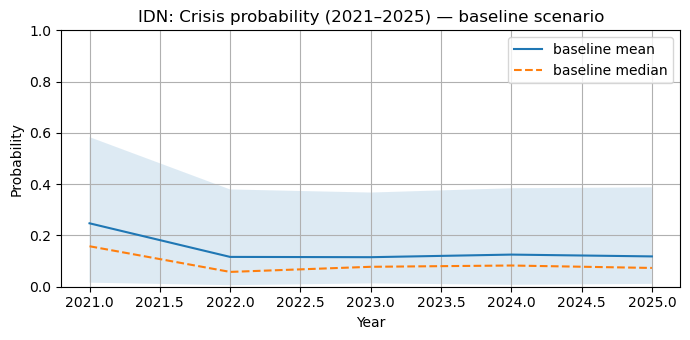

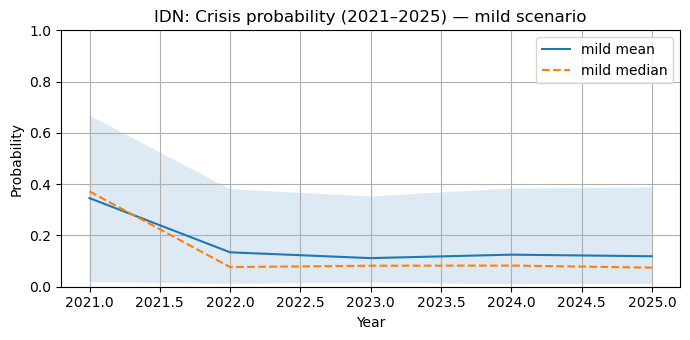

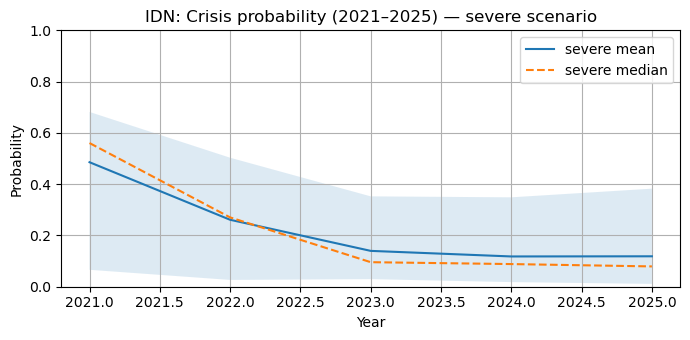


=== MYS ===


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Year,Scenario,mean,p05,p50,p95
2021,baseline,0.111,0.046,0.053,0.236
2022,baseline,0.045,0.004,0.015,0.161
2023,baseline,0.046,0.000,0.019,0.165
2024,baseline,0.051,0.002,0.022,0.183
2025,baseline,0.054,0.002,0.025,0.174
2021,mild,0.158,0.048,0.180,0.276
2022,mild,0.052,0.004,0.014,0.158
2023,mild,0.045,0.000,0.020,0.152
2024,mild,0.050,0.001,0.023,0.181
2025,mild,0.054,0.002,0.026,0.176


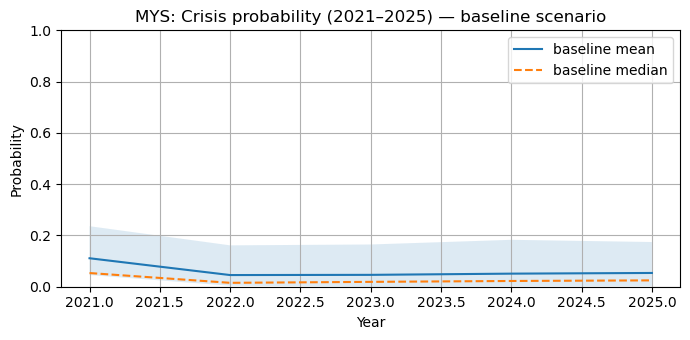

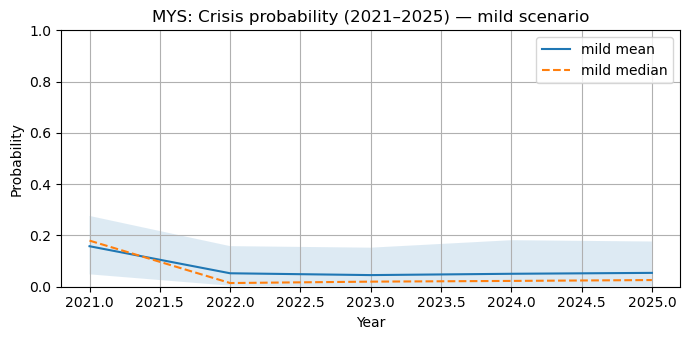

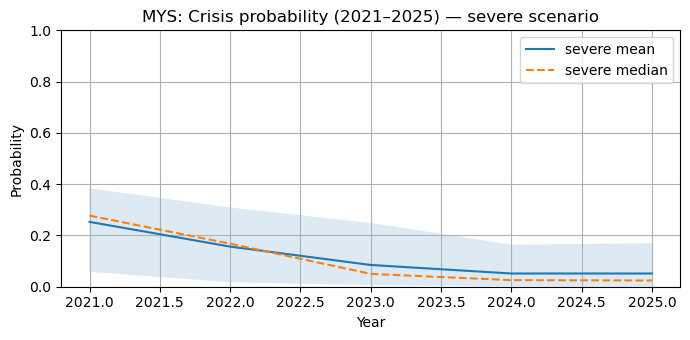


=== PHL ===


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Year,Scenario,mean,p05,p50,p95
2021,baseline,0.167,0.095,0.162,0.330
2022,baseline,0.045,0.017,0.031,0.114
2023,baseline,0.052,0.007,0.023,0.193
2024,baseline,0.092,0.009,0.044,0.303
2025,baseline,0.114,0.011,0.058,0.357
2021,mild,0.210,0.097,0.191,0.342
2022,mild,0.044,0.017,0.029,0.103
2023,mild,0.044,0.007,0.022,0.182
2024,mild,0.088,0.010,0.042,0.298
2025,mild,0.114,0.011,0.059,0.358


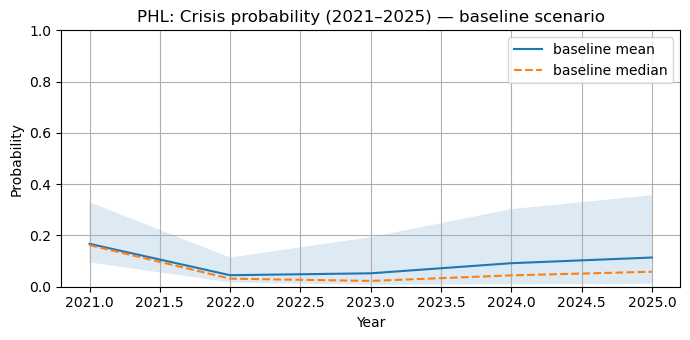

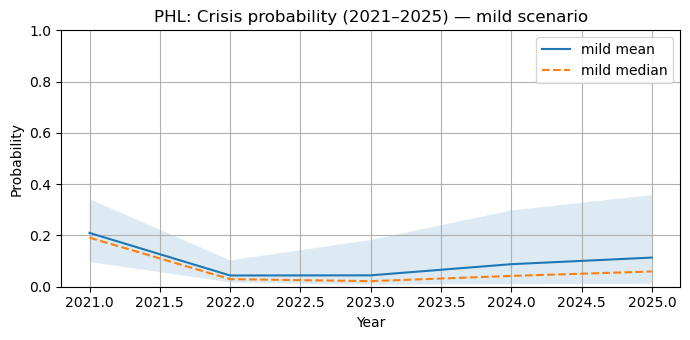

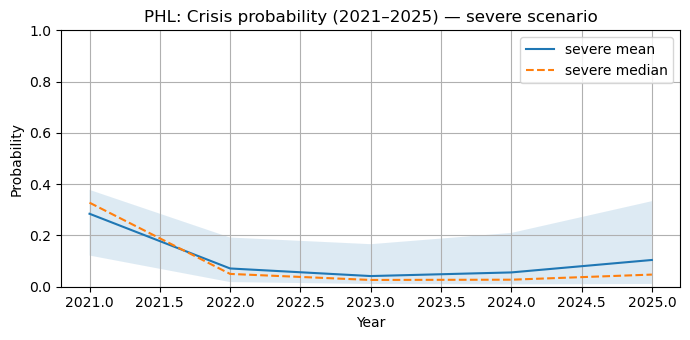


=== THA ===


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Year,Scenario,mean,p05,p50,p95
2021,baseline,0.570,0.284,0.643,0.742
2022,baseline,0.431,0.249,0.357,0.713
2023,baseline,0.400,0.249,0.326,0.756
2024,baseline,0.405,0.255,0.340,0.758
2025,baseline,0.432,0.263,0.378,0.773
2021,mild,0.650,0.321,0.692,0.767
2022,mild,0.456,0.249,0.511,0.733
2023,mild,0.382,0.245,0.312,0.708
2024,mild,0.399,0.256,0.338,0.755
2025,mild,0.432,0.263,0.378,0.773


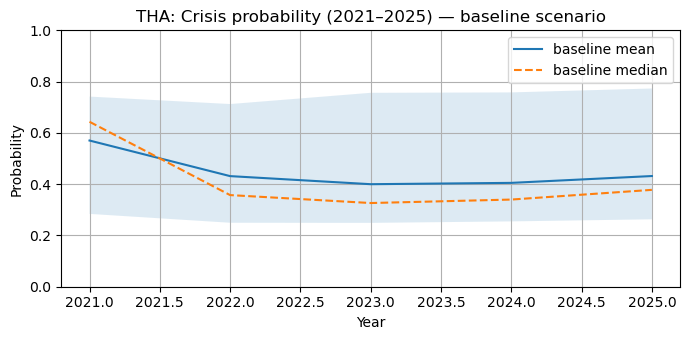

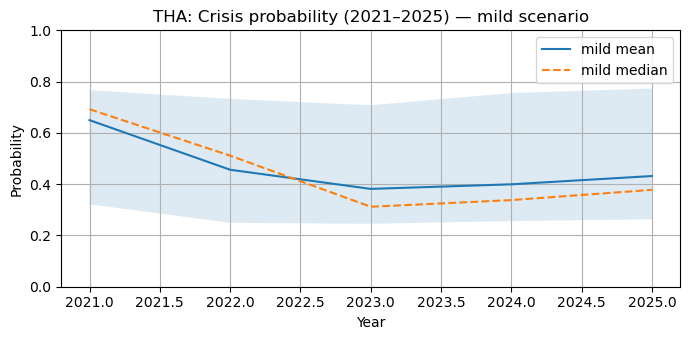

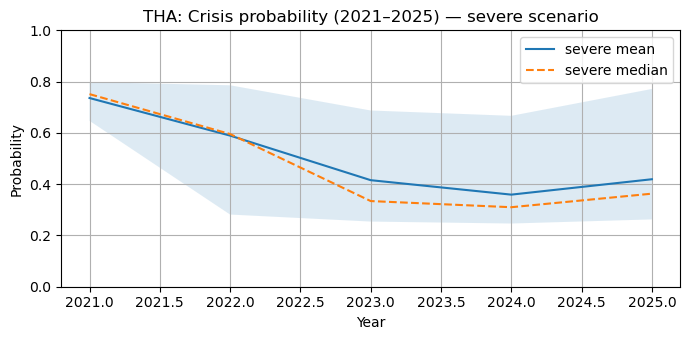

In [115]:
SIM_STEPS = 5
SIMS = 500

all_results = {}
for c in ['IDN','MYS','PHL','THA']:
    print(f"\n=== {c} ===")
    res_c = probs_from_simulations(
        country_code=c,
        hist_df=country_frames[c],
        best_entry=best_art[c],
        steps=SIM_STEPS,
        sims=SIMS,
        scenarios=('baseline','mild','severe'),
        seed=123
    )
    all_results[c] = res_c
    table_for_report(c, res_c)
    plot_fan_chart(c, res_c)

# Old

In [69]:
import numpy as np
import pandas as pd

def make_features(df):
    """
    Expects columns: Year, GDP, CPI, HH Consumption, Capital Formation, Crisis
    Returns a new dataframe with engineered features and NaNs dropped (from rolling windows).
    """
    d = df.sort_values('Year').copy()

    # First differences
    for col in ['GDP','CPI','HH Consumption','Capital Formation']:
        d[f'{col}_delta'] = d[col].diff()

    # Rolling mean/volatility and standardized deviations (3-year window works well on annual data)
    win = 3
    for col in ['GDP','CPI']:
        d[f'{col}_ma{win}']  = d[col].rolling(win).mean()
        d[f'{col}_std{win}'] = d[col].rolling(win).std()
        d[f'{col}_z{win}']   = (d[col] - d[f'{col}_ma{win}']) / d[f'{col}_std{win}']

    # Simple deterioration & stress indicators
    d['GDP_under0'] = (d['GDP'] < 0).astype(int)                     # contraction
    d['Joint_stress'] = ((d['GDP'] < d['GDP_ma3']) & (d['CPI_z3']>0)).astype(int)  # weak growth + above-normal inflation

    # Lags (1 year) for key signals
    for col in ['GDP','CPI','GDP_delta','CPI_delta','GDP_z3','CPI_z3']:
        if col in d.columns:
            d[f'{col}_lag1'] = d[col].shift(1)

    # Drop rows with NaNs introduced by rolling/lagging
    d = d.dropna().reset_index(drop=True)
    return d

In [70]:
BASE_FEATURES = [
    'GDP','CPI','HH Consumption','Capital Formation',
    'GDP_delta','CPI_delta',
    'GDP_ma3','CPI_ma3','GDP_std3','CPI_std3','GDP_z3','CPI_z3',
    'GDP_under0','Joint_stress',
    'GDP_lag1','CPI_lag1','GDP_delta_lag1','CPI_delta_lag1','GDP_z3_lag1','CPI_z3_lag1'
]

Best C: {'clf__C': 0.1}   Threshold: 0.566
=== Confusion Matrix ===
 [[31  4]
 [ 1  1]]
              precision    recall  f1-score   support

           0     0.9688    0.8857    0.9254        35
           1     0.2000    0.5000    0.2857         2

    accuracy                         0.8649        37
   macro avg     0.5844    0.6929    0.6055        37
weighted avg     0.9272    0.8649    0.8908        37

PR-AUC: 0.6667
    Year  Crisis  Pred      Prob
14  1998       1     1  0.785635
36  2020       0     1  0.704363
1   1985       0     1  0.683789
17  2001       0     1  0.675099
25  2009       0     1  0.634767
13  1997       1     0  0.555940
27  2011       0     0  0.543779
24  2008       0     0  0.529005
21  2005       0     0  0.528654
34  2018       0     0  0.517902
31  2015       0     0  0.516685
5   1989       0     0  0.515857


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_ranking.py:1030: Us

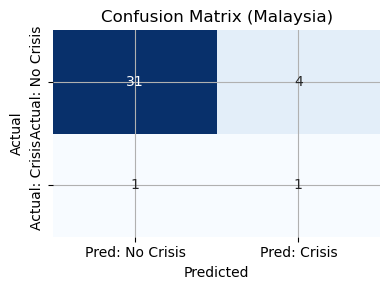


Top +weights (push toward crisis):
Series([], dtype: float64)

Top -weights (push toward non-crisis):
GDP_delta    0.372937
Name: abs(weight), dtype: float64


In [77]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.metrics import (classification_report, confusion_matrix,
                             average_precision_score, precision_recall_curve)

def fit_idn_and_inspect(idn_df, mys_df, feature_cols, beta=2):
    idn = make_features(idn_df)
    mys = make_features(mys_df)
    cols = [c for c in feature_cols if c in idn.columns and c in mys.columns]

    X_tr, y_tr = idn[cols], idn['Crisis']
    X_te, y_te = mys[cols], mys['Crisis']

    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('clf', LogisticRegression(class_weight='balanced',
                                   penalty='l1', solver='liblinear',
                                   max_iter=2000, random_state=0))
    ])

    tscv = TimeSeriesSplit(n_splits=5)
    grid = {'clf__C':[0.1, 0.3, 1.0, 3.0]}
    gcv = GridSearchCV(pipe, grid, cv=tscv, scoring='average_precision')
    gcv.fit(X_tr, y_tr)
    best = gcv.best_estimator_

    # Threshold tuned on training (F-beta, beta>1 favors recall)
    pr, rc, th = precision_recall_curve(y_tr, best.predict_proba(X_tr)[:,1])
    fbeta = (1+beta**2)*(pr*rc)/(beta**2*pr + rc + 1e-12)
    t_star = th[np.argmax(fbeta)] if len(th)>0 else 0.5
    print("Best C:", gcv.best_params_, "  Threshold:", round(t_star,3))

    # Evaluate on Malaysia
    p_te = best.predict_proba(X_te)[:,1]
    y_hat = (p_te >= t_star).astype(int)
    print("=== Confusion Matrix ===\n", confusion_matrix(y_te, y_hat))
    print(classification_report(y_te, y_hat, digits=4))
    print("PR-AUC:", round(average_precision_score(y_te, p_te),4))
    print(pd.DataFrame({'Year': mys['Year'], 'Crisis': y_te, 'Pred': y_hat, 'Prob': p_te})
            .sort_values('Prob', ascending=False).head(12))

    cm = confusion_matrix(y_te, y_hat)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=["Pred: No Crisis", "Pred: Crisis"],
                yticklabels=["Actual: No Crisis", "Actual: Crisis"])
    plt.title("Confusion Matrix (Malaysia)")
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.tight_layout()
    plt.show()

    # ---- Coefficients (important for your write-up)
    clf = best.named_steps['clf']
    coefs = pd.Series(clf.coef_.ravel(), index=cols).sort_values(key=abs, ascending=False)
    print("\nTop +weights (push toward crisis):")
    print(coefs[coefs>0].head(8))
    print("\nTop -weights (push toward non-crisis):")
    print(coefs[coefs<0].head(8).abs().rename('abs(weight)'))
    return best, t_star, coefs

# Example:
best_model, thresh, coef_series = fit_idn_and_inspect(indonesia, malaysia, BASE_FEATURES, beta=2)

In [48]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, average_precision_score, precision_recall_curve

# --- Build feature sets
idn = make_features(indonesia)
mys = make_features(malaysia)

feature_cols = [
    'GDP','CPI','HH Consumption','Capital Formation',
    'GDP_delta','CPI_delta',
    'GDP_ma3','CPI_ma3','GDP_std3','CPI_std3','GDP_z3','CPI_z3',
    'GDP_under0','Joint_stress',
    'GDP_lag1','CPI_lag1','GDP_delta_lag1','CPI_delta_lag1','GDP_z3_lag1','CPI_z3_lag1'
]
feature_cols = [c for c in feature_cols if c in idn.columns and c in mys.columns]  # keep only existing

X_train, y_train = idn[feature_cols], idn['Crisis']
X_test,  y_test  = mys[feature_cols], mys['Crisis']

# --- Pipeline & grid
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(
        class_weight='balanced',
        penalty='l1',            # sparse & interpretable
        solver='liblinear',
        max_iter=2000,
        random_state=0))
])

tscv = TimeSeriesSplit(n_splits=5)
param_grid = {'clf__C':[0.1, 0.3, 1.0, 3.0]}

gcv = GridSearchCV(pipe, param_grid, cv=tscv, scoring='average_precision')  # PR-AUC
gcv.fit(X_train, y_train)
best = gcv.best_estimator_
print("Best C:", gcv.best_params_)

# --- Threshold tuning on the training set (optimize F2 to favor recall)
probs_tr = best.predict_proba(X_train)[:,1]
prec, rec, thr = precision_recall_curve(y_train, probs_tr)
beta = 2
f2 = (1+beta**2)*(prec*rec)/(beta**2*prec + rec + 1e-12)
t_star = thr[np.argmax(f2)] if len(thr)>0 else 0.5
print(f"Chosen threshold (F2-optimal): {t_star:.3f}")

Best C: {'clf__C': 0.1}
Chosen threshold (F2-optimal): 0.566


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_ranking.py:1030: Us

In [49]:
probs_te = best.predict_proba(X_test)[:,1]
y_pred = (probs_te >= t_star).astype(int)

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred, digits=4))
print("PR-AUC (Average Precision):", round(average_precision_score(y_test, probs_te), 4))

# Top flagged years
mys_out = mys.copy()
mys_out['Prob'] = probs_te
mys_out['Pred'] = y_pred
print(mys_out[['Year','Crisis','Pred','Prob']].sort_values('Prob', ascending=False).head(12))

=== Confusion Matrix ===
[[31  4]
 [ 1  1]]

=== Classification Report ===
              precision    recall  f1-score   support

           0     0.9688    0.8857    0.9254        35
           1     0.2000    0.5000    0.2857         2

    accuracy                         0.8649        37
   macro avg     0.5844    0.6929    0.6055        37
weighted avg     0.9272    0.8649    0.8908        37

PR-AUC (Average Precision): 0.6667
Series Name  Year  Crisis  Pred      Prob
14           1998       1     1  0.785635
36           2020       0     1  0.704363
1            1985       0     1  0.683789
17           2001       0     1  0.675099
25           2009       0     1  0.634767
13           1997       1     0  0.555940
27           2011       0     0  0.543779
24           2008       0     0  0.529005
21           2005       0     0  0.528654
34           2018       0     0  0.517902
31           2015       0     0  0.516685
5            1989       0     0  0.515857


In [50]:
from sklearn.model_selection import GroupKFold

def prepare_country(df, name):
    d = make_features(df).copy()
    d['Country'] = name
    return d

def loco_evaluation(country_dfs, feature_cols, beta=2):
    """
    country_dfs: dict like {'IDN': indonesia, 'MYS': malaysia, 'PHL': philippines, 'THA': thailand}
    Prints metrics for each held-out country and returns a dict of per-country scored DataFrames.
    """
    scored = {}
    prepared = {k: prepare_country(v, k) for k,v in country_dfs.items()}

    for test_name in prepared.keys():
        te = prepared[test_name]
        tr = pd.concat([prepared[k] for k in prepared.keys() if k != test_name], ignore_index=True)

        # align features present in all splits
        cols = [c for c in feature_cols if c in tr.columns and c in te.columns]
        X_tr, y_tr, g_tr = tr[cols], tr['Crisis'], tr['Country']
        X_te, y_te = te[cols], te['Crisis']

        pipe = Pipeline([
            ('scaler', StandardScaler()),
            ('clf', LogisticRegression(class_weight='balanced',
                                       penalty='l1', solver='liblinear',
                                       max_iter=2000, random_state=0))
        ])

        # GroupKFold by Country to avoid leakage across countries during CV
        gkf = GroupKFold(n_splits=min(3, g_tr.nunique()))  # 3 folds or number of train countries
        grid = {'clf__C':[0.1, 0.3, 1.0, 3.0]}
        gcv = GridSearchCV(pipe, grid, cv=gkf.split(X_tr, y_tr, groups=g_tr),
                           scoring='average_precision')
        gcv.fit(X_tr, y_tr)
        best = gcv.best_estimator_

        # Threshold from training (F2 default)
        pr, rc, th = precision_recall_curve(y_tr, best.predict_proba(X_tr)[:,1])
        fbeta = (1+beta**2)*(pr*rc)/(beta**2*pr + rc + 1e-12)
        t_star = th[np.argmax(fbeta)] if len(th)>0 else 0.5

        p_te = best.predict_proba(X_te)[:,1]
        y_hat = (p_te >= t_star).astype(int)

        print(f"\n===== LOCO: Test on {test_name} (train on others) =====")
        print("Confusion Matrix:\n", confusion_matrix(y_te, y_hat))
        print(classification_report(y_te, y_hat, digits=4))
        print("PR-AUC:", round(average_precision_score(y_te, p_te),4))

        out = te[['Year','Crisis']].copy()
        out['Prob'] = p_te
        out['Pred'] = y_hat
        scored[test_name] = out.sort_values('Prob', ascending=False)

    return scored

results = loco_evaluation({'IDN': indonesia, 'MYS': malaysia, 'PHL': philippines, 'THA': thailand},
                          BASE_FEATURES, beta=2)
for k, df in results.items():
    print(k, df.head(12))


===== LOCO: Test on IDN (train on others) =====
Confusion Matrix:
 [[33  2]
 [ 1  1]]
              precision    recall  f1-score   support

           0     0.9706    0.9429    0.9565        35
           1     0.3333    0.5000    0.4000         2

    accuracy                         0.9189        37
   macro avg     0.6520    0.7214    0.6783        37
weighted avg     0.9361    0.9189    0.9264        37

PR-AUC: 0.6429

===== LOCO: Test on MYS (train on others) =====
Confusion Matrix:
 [[30  5]
 [ 1  1]]
              precision    recall  f1-score   support

           0     0.9677    0.8571    0.9091        35
           1     0.1667    0.5000    0.2500         2

    accuracy                         0.8378        37
   macro avg     0.5672    0.6786    0.5795        37
weighted avg     0.9244    0.8378    0.8735        37

PR-AUC: 0.5588

===== LOCO: Test on PHL (train on others) =====
Confusion Matrix:
 [[26  8]
 [ 1  2]]
              precision    recall  f1-score   support



In [51]:
import numpy as np
from sklearn.metrics import precision_recall_curve, confusion_matrix, classification_report, average_precision_score

def threshold_sweep_report(best_estimator, X_tr, y_tr, X_te, y_te, betas=(1.5, 2, 2.5, 3), extra_thresholds=(0.45, 0.50, 0.55)):
    probs_tr = best_estimator.predict_proba(X_tr)[:,1]
    probs_te = best_estimator.predict_proba(X_te)[:,1]
    pr, rc, thr = precision_recall_curve(y_tr, probs_tr)

    # Pick F-beta thresholds
    t_choices = []
    for b in betas:
        f = (1+b**2)*(pr*rc)/(b**2*pr + rc + 1e-12)
        t_star = thr[np.argmax(f)] if len(thr)>0 else 0.5
        t_choices.append(('F{:.1f}'.format(b), float(t_star)))

    # Add a few fixed thresholds for context
    for t in extra_thresholds:
        t_choices.append(('fixed_{:.2f}'.format(t), float(t)))

    # Deduplicate & sort
    seen, final = set(), []
    for name, t in t_choices:
        if t not in seen:
            final.append((name, t)); seen.add(t)

    print("Train-set PR-AUC:", round(average_precision_score(y_tr, probs_tr),4))
    print("Test-set  PR-AUC:", round(average_precision_score(y_te, probs_te),4))
    print("\n--- Threshold sensitivity on TEST ---")
    for name, t in final:
        y_hat = (probs_te >= t).astype(int)
        cm = confusion_matrix(y_te, y_hat)
        print(f"\n{name} threshold = {t:.3f}")
        print(cm)
        print(classification_report(y_te, y_hat, digits=4))

In [52]:
threshold_sweep_report(best, X_train, y_train, X_test, y_test, betas=(2,2.5,3), extra_thresholds=(0.40,0.45,0.50,0.55))

Train-set PR-AUC: 0.75
Test-set  PR-AUC: 0.6667

--- Threshold sensitivity on TEST ---

F2.0 threshold = 0.566
[[31  4]
 [ 1  1]]
              precision    recall  f1-score   support

           0     0.9688    0.8857    0.9254        35
           1     0.2000    0.5000    0.2857         2

    accuracy                         0.8649        37
   macro avg     0.5844    0.6929    0.6055        37
weighted avg     0.9272    0.8649    0.8908        37


fixed_0.40 threshold = 0.400
[[ 4 31]
 [ 0  2]]
              precision    recall  f1-score   support

           0     1.0000    0.1143    0.2051        35
           1     0.0606    1.0000    0.1143         2

    accuracy                         0.1622        37
   macro avg     0.5303    0.5571    0.1597        37
weighted avg     0.9492    0.1622    0.2002        37


fixed_0.45 threshold = 0.450
[[ 7 28]
 [ 0  2]]
              precision    recall  f1-score   support

           0     1.0000    0.2000    0.3333        35
         

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

features = ['GDP', 'CPI', 'HH Consumption', 'Capital Formation',
            'GDP_delta', 'CPI_delta', 'HH_Consumption_delta', 'Capital_Formation_delta']

X_train = indonesia[features]
y_train = indonesia['Crisis']

X_test = malaysia[features]
y_test = malaysia['Crisis']

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))

print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred, digits=4))

=== Confusion Matrix ===
[[38  0]
 [ 1  1]]

=== Classification Report ===
              precision    recall  f1-score   support

           0     0.9744    1.0000    0.9870        38
           1     1.0000    0.5000    0.6667         2

    accuracy                         0.9750        40
   macro avg     0.9872    0.7500    0.8268        40
weighted avg     0.9756    0.9750    0.9710        40



In [33]:
# Optional: See which years were predicted as crisis
malaysia['Predicted_Crisis'] = y_pred
print(malaysia[malaysia['Predicted_Crisis'] == 1][['Year', 'GDP', 'CPI', 'Predicted_Crisis']])

Series Name  Year       GDP       CPI  Predicted_Crisis
17           1998 -7.359415  5.270342                 1


In [34]:
probs = model.predict_proba(X_test_scaled)[:, 1]  # Probability of class 1 (crisis)
malaysia['Crisis_Probability'] = probs

print(malaysia[['Year', 'Crisis', 'Predicted_Crisis', 'Crisis_Probability']].sort_values('Crisis_Probability', ascending=False).head(10))

Series Name  Year  Crisis  Predicted_Crisis  Crisis_Probability
17           1998       1                 1            0.921431
4            1985       0                 0            0.221298
39           2020       0                 0            0.123591
20           2001       0                 0            0.068617
28           2009       0                 0            0.050849
11           1992       0                 0            0.035820
3            1984       0                 0            0.034406
15           1996       0                 0            0.030851
38           2019       0                 0            0.026549
16           1997       1                 0            0.022820


In [35]:
indonesia['GDP_lag1'] = indonesia['GDP'].shift(1)
indonesia['CPI_lag1'] = indonesia['CPI'].shift(1)
indonesia['HH_Consumption_lag1'] = indonesia['HH Consumption'].shift(1)
indonesia['Capital_Formation_lag1'] = indonesia['Capital Formation'].shift(1)

indonesia['GDP_delta_lag1'] = indonesia['GDP_delta'].shift(1)
indonesia['CPI_delta_lag1'] = indonesia['CPI_delta'].shift(1)
indonesia['HH_Consumption_delta_lag1'] = indonesia['HH_Consumption_delta'].shift(1)
indonesia['Capital_Formation_delta_lag1'] = indonesia['Capital_Formation_delta'].shift(1)

indonesia = indonesia.dropna().reset_index(drop=True)

indonesia[['Year', 'GDP', 'GDP_delta', 'GDP_lag1', 'GDP_delta_lag1']].head()

Series Name,Year,GDP,GDP_delta,GDP_lag1,GDP_delta_lag1
0,1982,2.246445,-5.680711,7.927157,-1.952921
1,1983,4.192967,1.946522,2.246445,-5.680711
2,1984,6.975528,2.782560,4.192967,1.946522
3,1985,2.462144,-4.513384,6.975528,2.782560
4,1986,5.875045,3.412902,2.462144,-4.513384


In [36]:
malaysia['GDP_lag1'] = malaysia['GDP'].shift(1)
malaysia['CPI_lag1'] = malaysia['CPI'].shift(1)
malaysia['HH_Consumption_lag1'] = malaysia['HH Consumption'].shift(1)
malaysia['Capital_Formation_lag1'] = malaysia['Capital Formation'].shift(1)

malaysia['GDP_delta_lag1'] = malaysia['GDP_delta'].shift(1)
malaysia['CPI_delta_lag1'] = malaysia['CPI_delta'].shift(1)
malaysia['HH_Consumption_delta_lag1'] = malaysia['HH_Consumption_delta'].shift(1)
malaysia['Capital_Formation_delta_lag1'] = malaysia['Capital_Formation_delta'].shift(1)

malaysia = malaysia.dropna().reset_index(drop=True)

malaysia[['Year', 'GDP', 'GDP_delta', 'GDP_lag1', 'GDP_delta_lag1']].head()

Series Name,Year,GDP,GDP_delta,GDP_lag1,GDP_delta_lag1
0,1982,5.943152,-0.998952,6.942104,-0.499723
1,1983,6.252231,0.309078,5.943152,-0.998952
2,1984,7.761790,1.509559,6.252231,0.309078
3,1985,-1.025250,-8.787040,7.761790,1.509559
4,1986,1.240595,2.265845,-1.025250,-8.787040


In [37]:
features = [
    'GDP', 'CPI', 'HH Consumption', 'Capital Formation',
    'GDP_delta', 'CPI_delta', 'HH_Consumption_delta', 'Capital_Formation_delta',
    'GDP_lag1', 'CPI_lag1', 'HH_Consumption_lag1', 'Capital_Formation_lag1',
    'GDP_delta_lag1', 'CPI_delta_lag1', 'HH_Consumption_delta_lag1', 'Capital_Formation_delta_lag1'
]

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

X_train = indonesia[features]
y_train = indonesia['Crisis']

X_test = malaysia[features]
y_test = malaysia['Crisis']

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [39]:
y_pred = model.predict(X_test_scaled)
probs = model.predict_proba(X_test_scaled)[:, 1]

malaysia['Predicted_Crisis'] = y_pred
malaysia['Crisis_Probability'] = probs

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))

print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred, digits=4))

malaysia[['Year', 'Crisis', 'Predicted_Crisis', 'Crisis_Probability']].sort_values('Crisis_Probability', ascending=False).head(10)

=== Confusion Matrix ===
[[37  0]
 [ 1  1]]

=== Classification Report ===
              precision    recall  f1-score   support

           0     0.9737    1.0000    0.9867        37
           1     1.0000    0.5000    0.6667         2

    accuracy                         0.9744        39
   macro avg     0.9868    0.7500    0.8267        39
weighted avg     0.9750    0.9744    0.9703        39



Series Name,Year,Crisis,Predicted_Crisis,Crisis_Probability
16,1998,1,1,0.946534
3,1985,0,0,0.145284
10,1992,0,0,0.076244
14,1996,0,0,0.061146
38,2020,0,0,0.052247
19,2001,0,0,0.046421
2,1984,0,0,0.032177
15,1997,1,0,0.026858
1,1983,0,0,0.025099
0,1982,0,0,0.023714


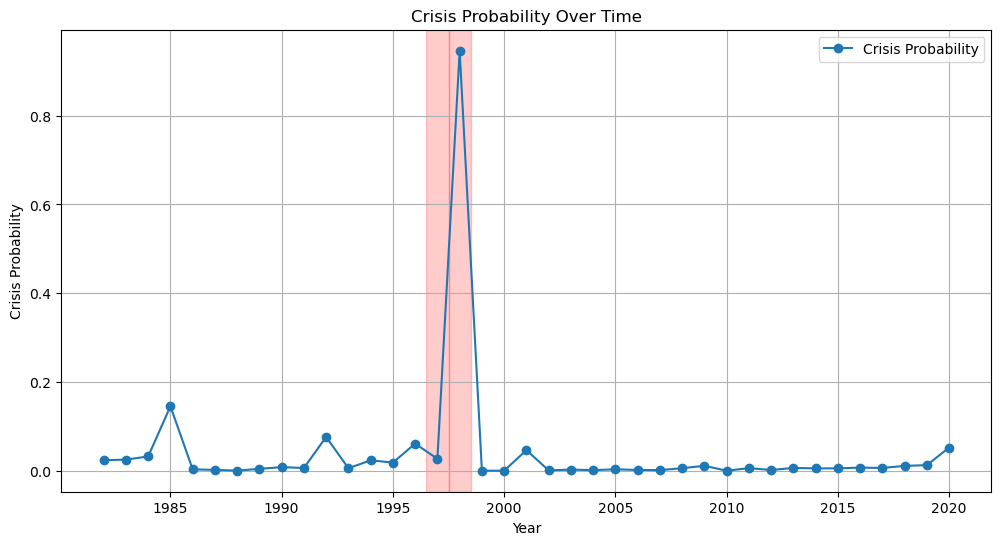

count    39.000000
mean      0.040949
std       0.151377
min       0.000050
25%       0.002294
50%       0.006187
75%       0.023616
max       0.946534
Name: Crisis_Probability, dtype: float64

In [40]:
# Visualize the results
import matplotlib.pyplot as plt
def shade_crisis(ax, crisis_years):
    for year in crisis_years:
        ax.axvspan(year - 0.5, year + 0.5, color='red', alpha=0.2)
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(malaysia['Year'], malaysia['Crisis_Probability'], marker='o', label='Crisis Probability')
shade_crisis(ax, [1997, 1998])
ax.set_title('Crisis Probability Over Time')
ax.set_xlabel('Year')
ax.set_ylabel('Crisis Probability')
ax.legend()
ax.grid(True)
plt.show()
malaysia['Crisis_Probability'].describe()